# SollmaFin. Исследование результатов А/В-теста и поиск инсайтов

SollmaFin — международное мобильное приложение для онлайн-торговли финансовыми активами. Пользователи могут инвестировать деньги в акции, валюту, криптовалюту, биржевые фонды (ETF) и другие активы. Целевая аудитория приложения — начинающие инвесторы. Получить доступ к финансовым рынкам можно со смартфона либо через веб-версию. 

Приложение ориентировано на рынок Латинской Америки с акцентом на четыре страны: Мексику, Бразилию, Колумбию и Аргентину — там быстро растёт интерес к финтеху и инвестициям, а экономики очень разные. 

Появилась гипотеза о недостаточной финансовой грамотности пользователей: они не понимают, как работать с активами разной степени риска. Клиенты покупают активы с высоким риском и теряют деньги, что снижает вовлечённость.
Команда продукта решила обновить онбординг пользователей и добавить в него детальную информацию о различиях финансовых активов и связанных с ними рисках. Однако появилось опасение, что углублённый онбординг отпугнёт клиентов от пополнения депозита и более рискованных вложений. 

Чтобы разобраться, команда решила провести A/B-эксперимент. 

### А/В-эксперимент

В эксперименте участвовали новые пользователи, которые зарегистрировались в приложении со 2 по 15 июня 2025 года. 
Пользователей случайным образом разделили на две равные группы: 
- Контрольная группа проходила стандартный онбординг без обязательного обучения.
- Тестовая группа проходила обновлённый онбординг с подробной информацией об активах и связанных с ними рисках. 

После разделения активность пользователей анализировали в течение недели.

Цель эксперимента — оценить, как обновлённый онбординг влияет на поведение пользователей и их дальнейшую инвестиционную активность.

При внедрении новой фичи команда продукта выдвинула такие гипотезы:
- Гипотеза роста: обучающий онбординг помогает пользователям лучше понимать принципы инвестирования, поэтому они будут чаще открывать второй депозит.
- Гипотеза риска: информация о возможных потерях и высоких рисках отпугнёт некоторых новичков, особенно самых осторожных, что снизит конверсию в первый депозит.
- Дополнительная гипотеза: после нового онбординга пользователи, которые выбрали высокорискованные активы, будут чаще, чем раньше, возвращаться и открывать второй депозит. При старом онбординге пользователи часто покупали активы с высоким риском без понимания последствий. Это приводило к потерям и оттоку после первого депозита. 

Чтобы увидеть полную картину, недостаточно следить за метриками конверсии. Команда выбрала для эксперимента такой набор метрик: 
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Ожидалось, что ключевая и барьерная метрики не упадут, а вспомогательные покажут значительный рост. 

### Задачи 

Предстоит провести полный анализ результатов А/В-эксперимента. Но перед этим нужно погрузиться в продукт и изучить исторические данные.    


#### 1. Анализ исторических данных

Чтобы понять, для чего была разработана новая фича, нужно изучить исторические данные: 
- Поведение новых пользователей, в том числе динамику привлечения, сегментацию и ключевые этапы воронки действий.
- Метрики, связанные с внесением депозитов, в том числе средние суммы депозитов. 

#### 2. Анализ данных А/В-теста

Изучение результатов эксперимента будет состоять из двух этапов: 
- Сравнение поведения пользователей в контрольной и тестовой группах, оценка статистической значимости изменений. 
- Исследование влияния нового онбординга на поведение платящих пользователей. В исследовании будем использовать бутстрап и сосредотимся на нижних и верхних перцентилях распределения депозитов. 
- Такой подход позволит понять, как обновлённый онбординг повлиял на ключевые бизнес-метрики, найти точки роста и сформулировать рекомендации по улучшению пользовательского опыта и монетизации.


### Данные

Будем работать с двумя датасетами:  

1. Датасет `/datasets/pa_sollmafin_hist.csv` содержит исторические данные о ключевых действиях новых пользователей, привлечённых в период с 1 апреля по 1 июня 2025 года включительно. В датасете собраны действия пользователей до оформления второго депозита. 
2. Датасет `/datasets/pa_sollmafin_abt.csv` содержит данные А/В-эксперимента — все действия новых пользователей, которые зарегистрировались со 2 по 15 июня 2025 года включительно. Данные собраны в рамках проверки гипотезы о влиянии нового онбординга на поведение и активность пользователей. Пользователи уже распределены по группам А/В-эксперимента.

Общие поля датасетов:
- `user_id` — уникальный идентификатор пользователя;
- `country_code` — код страны пользователя в формате ISO (например, `BR` — Бразилия, `MX` — Мексика, `AR` — Аргентина, `CO` — Колумбия);
- `platform` — устройство, с которого пользователь взаимодействует с продуктом: mobile или web;
- `first_ts` — время первого появления пользователя в системе;
- `first_dt` — дата первого появления пользователя (без времени);
- `event_ts` — время события;
- `event_name` — название события;
- `amount` — сумма пополнения депозита;
- `asset` — тип приобретённого актива; 
- `risk_level` — уровень риска актива: low — низкий риск, medium — средний риск, high — высокий риск.

В датасете `/datasets/pa_sollmafin_abt.csv` содержатся два дополнительных поля:
- `ab_test` — название А/В-эксперимента;
- `group` — пользовательская группа А/В-эксперимента.


### План проекта
1. Загрузка исторических данных и их предобработка
2. Исследовательский анализ исторических данных
3. Исследование результатов А/В эксперимента
4. Анализ изменений суммы депозитов на платящего пользователя
5. Выводы

---

## Часть

###  Загрузка исторических данных и их предобработка

Загрузим данные из датасета `https://code.s3.yandex.net/datasets/pa_sollmafin_hist.csv` и получим основную информацию о них. Проведем предобработку. Зафиксируем основную информацию о данных и предобработке в кратком промежуточном выводе.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Загрузим данные и парсируем временные поля
df_hist = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_sollmafin_hist.csv', parse_dates = (['first_ts', 'first_dt', 'event_ts']))

In [3]:
# Изучаем данные
display(df_hist.head())
df_hist.info()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,amount,asset,risk_level
0,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:51,install / open_web,NaN,NaN,NaN
1,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 19:55:59,introduction,NaN,NaN,NaN
2,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:06,registration,NaN,NaN,NaN
3,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:46:15,main_page,NaN,NaN,NaN
4,548ac59f-656d-4110-80d2-49f0a217f08a,BR,mobile,2025-04-02 19:55:51,2025-04-02,2025-04-02 23:47:59,onboarding_complete,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       238059 non-null  object        
 1   country_code  238059 non-null  object        
 2   platform      238059 non-null  object        
 3   first_ts      238059 non-null  datetime64[ns]
 4   first_dt      238059 non-null  datetime64[ns]
 5   event_ts      238059 non-null  datetime64[ns]
 6   event_name    238059 non-null  object        
 7   amount        33093 non-null   float64       
 8   asset         15392 non-null   object        
 9   risk_level    15392 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 18.2+ MB


Датасет df_hist содержит информацию об активности пользователей в приложении и состоит из 238059 строк в 10 столбцах.

In [4]:
# Оптимизируем тип данных числового столбца
df_hist['amount'] = pd.to_numeric(df_hist['amount'], downcast='float')

In [5]:
# Функция оптимизации object в category
def optimize_dtypes(df):
    # Оптимизация целочисленных колонок
    obj_cols = ['platform', 'country_code', 'risk_level', 'asset', 'event_name']
    for col in obj_cols:
        df_hist[col] = df_hist[col].astype('category')
    return df
# Применяем функцию
df_hist = optimize_dtypes(df_hist)
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238059 entries, 0 to 238058
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       238059 non-null  object        
 1   country_code  238059 non-null  category      
 2   platform      238059 non-null  category      
 3   first_ts      238059 non-null  datetime64[ns]
 4   first_dt      238059 non-null  datetime64[ns]
 5   event_ts      238059 non-null  datetime64[ns]
 6   event_name    238059 non-null  category      
 7   amount        33093 non-null   float32       
 8   asset         15392 non-null   category      
 9   risk_level    15392 non-null   category      
dtypes: category(5), datetime64[ns](3), float32(1), object(1)
memory usage: 9.3+ MB


Категориальные данные приведены к соответствующему типу, что позволило в 2 раза уменьшить затраты ресурса памяти.

In [6]:
# Считаем пропуски
missing_df = (pd.DataFrame({'Кол-во пропусков': df_hist.isnull().sum(), 
                                        'Процент пропусков': round(df_hist.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='Greys'))
missing_df

,Кол-во пропусков,Процент пропусков
asset,222667,93.500000
risk_level,222667,93.500000
amount,204966,86.100000
user_id,0,0.000000
country_code,0,0.000000
platform,0,0.000000
first_ts,0,0.000000
first_dt,0,0.000000
event_ts,0,0.000000
event_name,0,0.000000


 Пропуски по-видимому обусловлены бизнес логикой

In [7]:
# Посмотрим в каком периоде представлены данные
print("Диапазон дат first_dt:",
      df_hist['first_dt'].dt.date.min(), "-", df_hist['first_dt'].dt.date.max())
print("Диапазон дат event_ts:",
      df_hist['event_ts'].dt.date.min(), "-", df_hist['event_ts'].dt.date.max())

Диапазон дат first_dt: 2025-04-01 - 2025-06-01
Диапазон дат event_ts: 2025-04-01 - 2025-06-09


Данные содержат информацию за период появления новых пользователей `2025-04-01` - `2025-06-01` 

и период событий `2025-04-01` - `2025-06-09`

In [8]:
# Проверяем наличие явных дубликатов
print(df_hist.duplicated().sum())

0


In [9]:
# Проверяем наличие неявных дубликатов с одинаковыми пользователями  и временем события
print(df_hist[['user_id', 'event_ts']].duplicated().sum())

0


In [10]:
# Посмотрим общее количество уникальных пользователей, типы платформ, страны, типы событий
print('Общее число уникальных пользователей', df_hist['user_id'].nunique())
print('Платформы\n',
      df_hist['platform'].value_counts())
print('Коды стран\n', df_hist['country_code'].unique())
print('Типы событий\n', df_hist['event_name'].unique())

Общее число уникальных пользователей 41032
Платформы
 platform
mobile    166698
web        71361
Name: count, dtype: int64
Коды стран
 ['BR', 'AR', 'CO', 'MX']
Categories (4, object): ['AR', 'BR', 'CO', 'MX']
Типы событий
 ['install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit']
Categories (8, object): ['asset_purchase', 'first_deposit', 'install / open_web', 'introduction', 'main_page', 'onboarding_complete', 'registration', 'second_deposit']


In [11]:
# Выведем статистику сумм депозитов
df_hist['amount'].describe()

count    33093.000000
mean       113.527969
std         34.472500
min         27.000000
25%         90.000000
50%        109.000000
75%        131.000000
max        524.000000
Name: amount, dtype: float64

Минимальный депозит 27, максимальный 524. Среднее значение 114 близко к медиане 109, распределение по-видимому нормально-подобное с небольшим сдвигом в область низких значений. Ожидается правосторонний хвост.

####  Промежуточный вывод

 **Загрузка и предобработка данных завершена**. 
 
Получен датасет `df_hist` с исторической информацией о пользователях, их поведении и финансовыми данными

🔍 Анализ и предобработка:
- ✔️ Названия корректны  
- ✔️ Типы данных преобразованы и оптимизированы
- ✔️ Наличие пропусков системно и отражает бизнес-логику сервиса  
- ✔️ Явных и неявных дубликатов нет 
- ✔️ Аномальных значений не зафиксировано
- ✔️ Период апрель-май 2025
- ✔️ Число уникальных пользователей: 41032
- ✔️ Типы платформ: Mobile, Web
- ✔️ Коды стран: 'BR', 'AR', 'CO', 'MX' 
- ✔️ Типы событий: install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit 

✅ Данные позволяют проводить дальнейший анализ

---

### Исследовательский анализ исторических данных

Проведем исследовательский анализ исторических данных. По каждой подзадаче сделаем промежуточный вывод. 

**Задача 2.1.** Анализ новых пользователей.
- Изучим динамику привлечения новых пользователей в приложение.

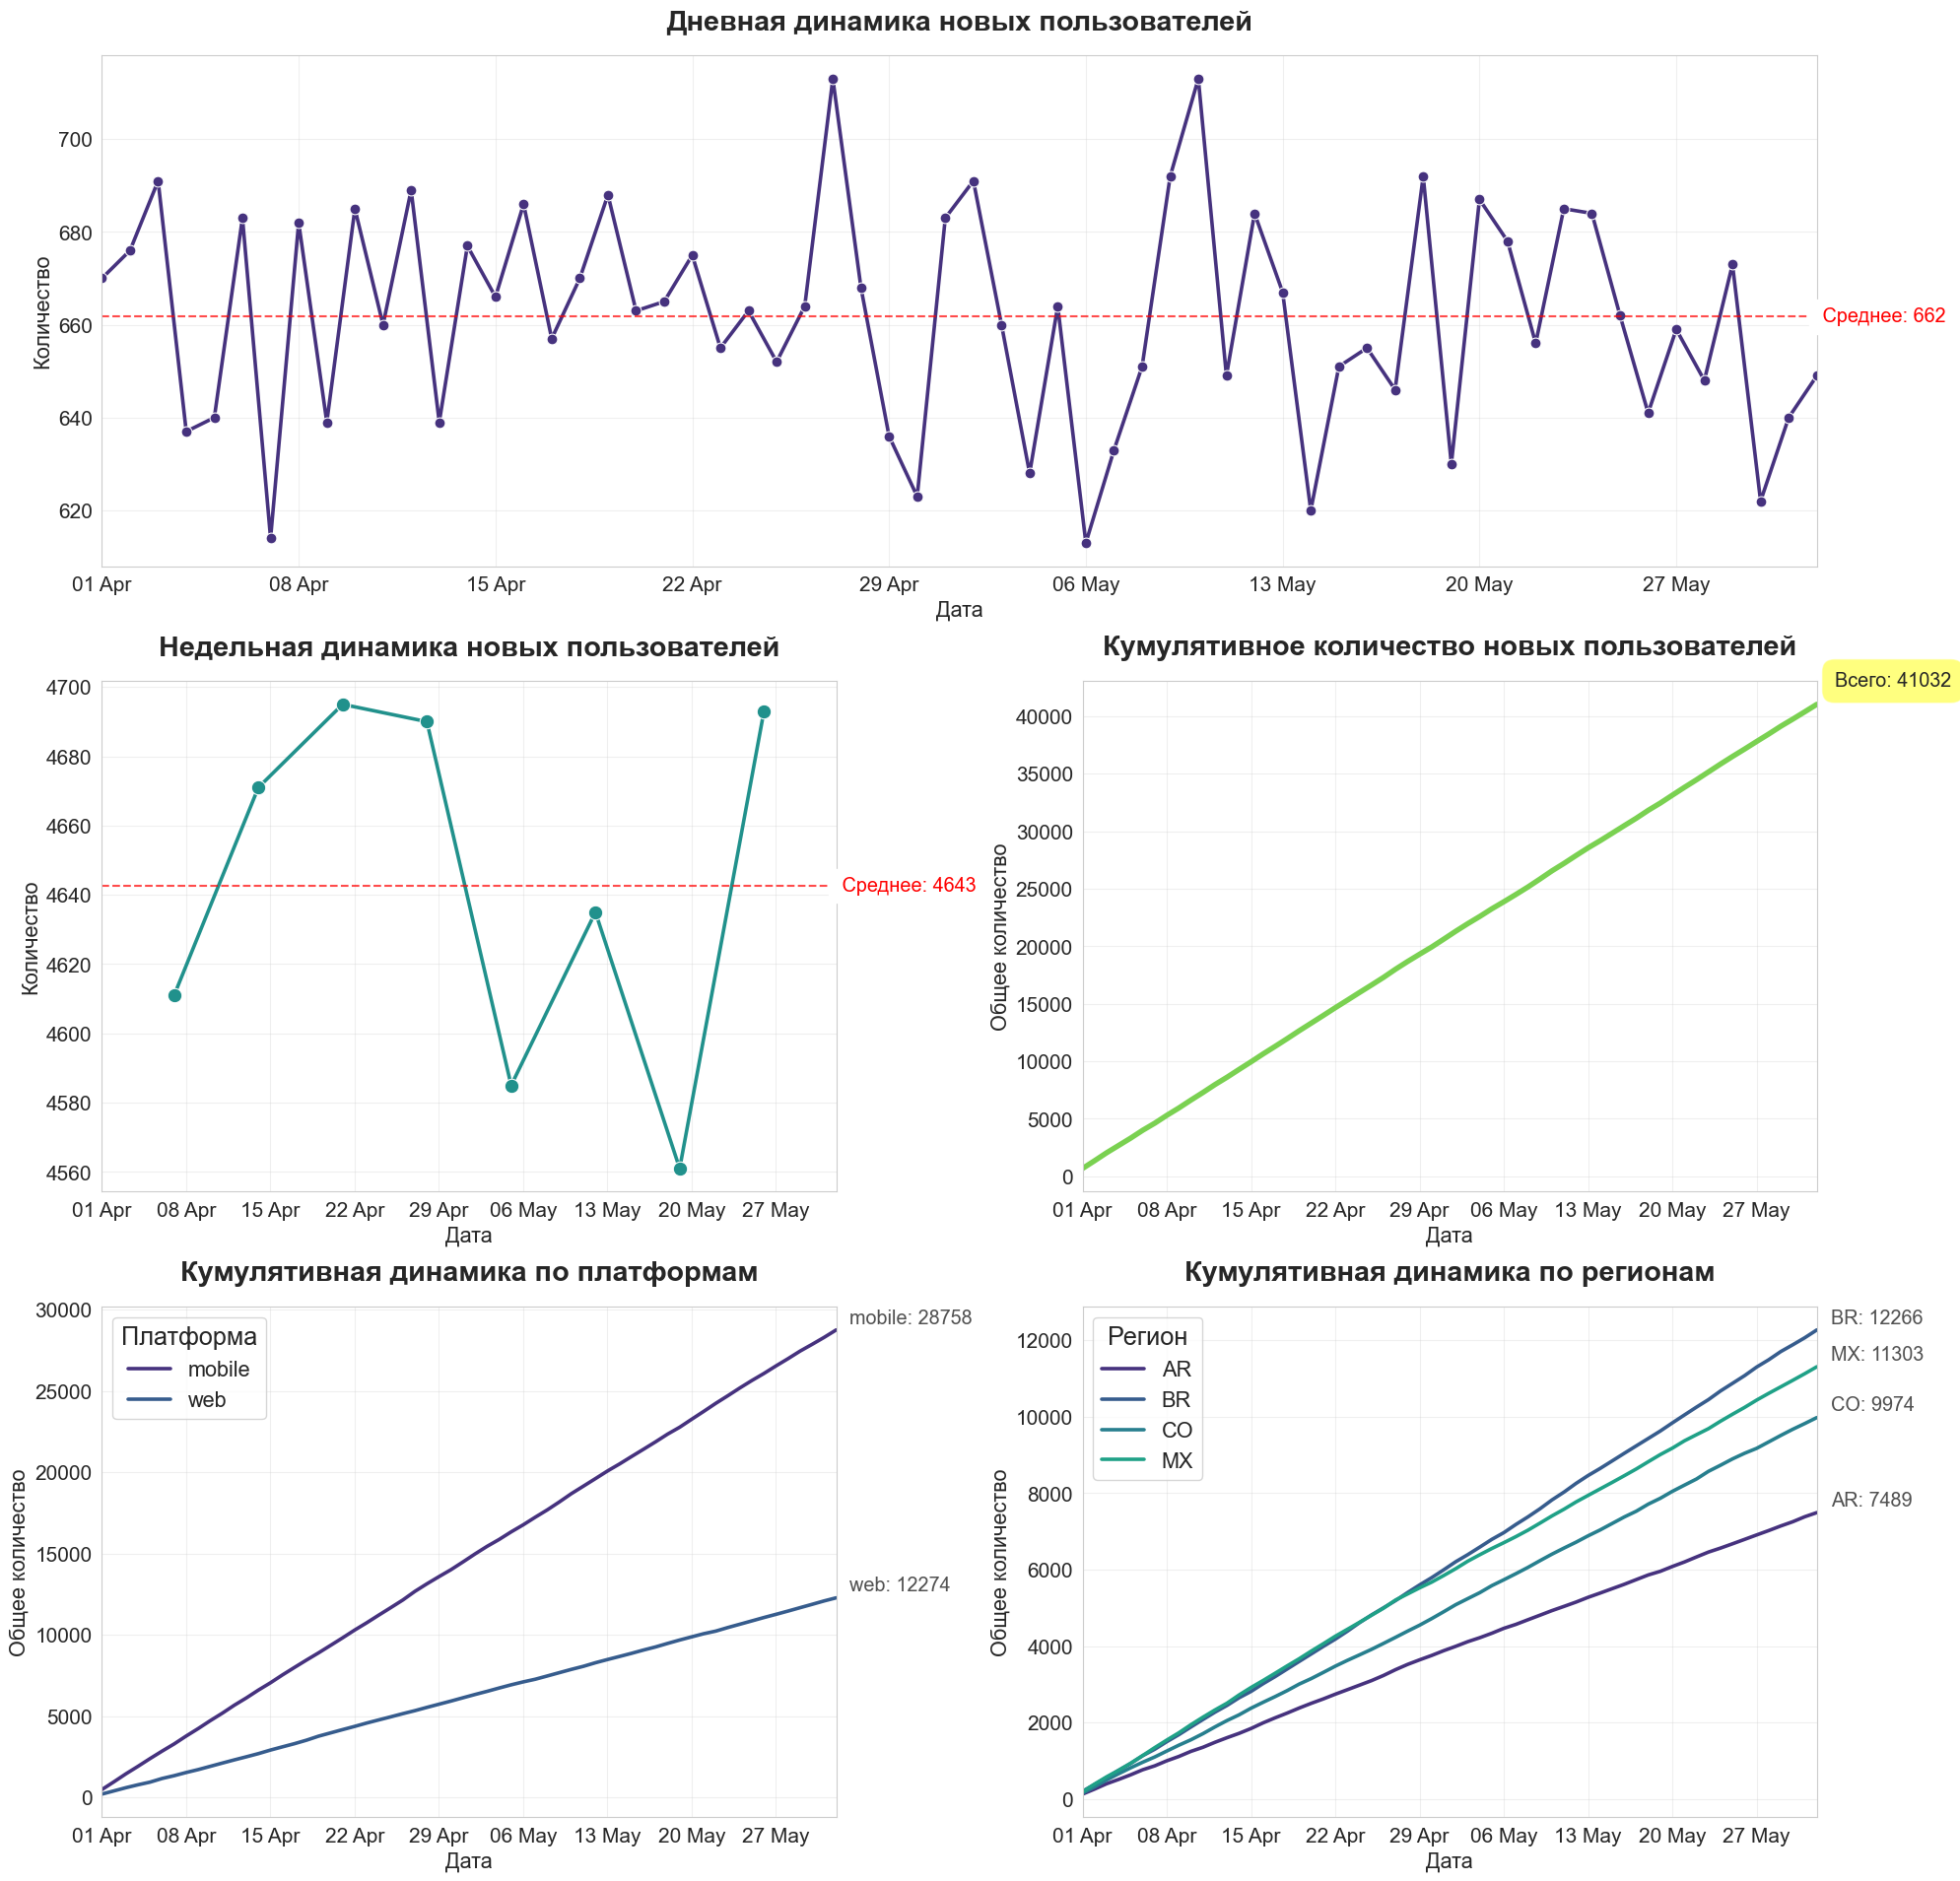

In [12]:


# Подготовка данных всех пользователей
daily_users = df_hist.groupby('first_dt')['user_id'].nunique().reset_index()
daily_users.columns = ['date', 'new_users']

# Подготовка данных пользователей по платформам и регионам
# Добавляем observed=True для подавления предупреждения
daily_users_platform = df_hist.groupby(['first_dt', 'platform'], observed=True)['user_id'].nunique().reset_index()
daily_users_region = df_hist.groupby(['first_dt', 'country_code'], observed=True)['user_id'].nunique().reset_index()

daily_users_platform.columns = ['date', 'platform', 'new_users']
daily_users_region.columns = ['date', 'country_code', 'new_users']

# Убедимся, что колонки не являются категориальными
daily_users_platform['platform'] = daily_users_platform['platform'].astype(str)
daily_users_region['country_code'] = daily_users_region['country_code'].astype(str)

# Создаем недельные и кумулятивные данные
weekly_users = daily_users.set_index('date').resample('W-Mon').sum().reset_index()
weekly_users = weekly_users.iloc[:-1] if len(weekly_users) > 1 else weekly_users
cumulative_users = daily_users.set_index('date').cumsum().reset_index()

# Создаем кумулятивные данные по платформам
cumulative_users_platform = daily_users_platform.copy()
cumulative_users_platform['cumulative'] = cumulative_users_platform.groupby('platform')['new_users'].cumsum()

# Создаем кумулятивные данные по регионам
cumulative_users_region = daily_users_region.copy()
cumulative_users_region['cumulative'] = cumulative_users_region.groupby('country_code')['new_users'].cumsum()

# Определяем общие границы и формат оси X
x_min = daily_users['date'].min()
x_max = daily_users['date'].max()
date_format = DateFormatter('%d %b')
locator = mdates.WeekdayLocator(interval=1)

# Настройка стиля - используем доступные стили matplotlib
# Вместо 'seaborn-whitegrid' используем один из следующих вариантов:
# Вариант 1: Использовать стиль из seaborn (если установлен seaborn)
sns.set_style("whitegrid")  # это установит стиль для seaborn

# Вариант 2: Использовать matplotlib style
# plt.style.use('ggplot')  # или 'bmh', 'fivethirtyeight', 'seaborn-v0_8-whitegrid'

# Настраиваем палитру
sns.set_palette("viridis")

# Создаем фигуру
fig = plt.figure(figsize=(20, 25))

# 1. Дневная динамика - на всю ширину
ax1 = plt.subplot(4, 1, 1)
ax1 = sns.lineplot(data=daily_users, x='date', y='new_users', 
                  linewidth=2.6, marker='o', markersize=7.8, ax=ax1)
ax1.set_xlim([x_min, x_max])
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(locator)
ax1.set_title('Дневная динамика новых пользователей', fontsize=20.8, pad=19.5, fontweight='bold')
ax1.set_xlabel('Дата', fontsize=15.6)
ax1.set_ylabel('Количество', fontsize=15.6)
ax1.grid(True, alpha=0.3)

ax1.tick_params(axis='both', which='major', labelsize=15)

# Среднее значение с подписью
mean_daily = daily_users['new_users'].mean()
ax1.axhline(mean_daily, color='red', linestyle='--', alpha=0.7)
ax1.text(x_max, mean_daily, f' Среднее: {mean_daily:.0f}', 
        color='red', va='center', ha='left', backgroundcolor='white', fontsize=14.3)

# 2. Недельная динамика
ax2 = plt.subplot(4, 2, 3)
ax2 = sns.lineplot(data=weekly_users, x='date', y='new_users', 
                  linewidth=2.6, marker='o', markersize=10.4, 
                  color=plt.get_cmap('viridis')(0.5), ax=ax2)
ax2.set_xlim([x_min, x_max])
ax2.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_locator(locator)
ax2.set_title('Недельная динамика новых пользователей', fontsize=20.8, pad=19.5, fontweight='bold')
ax2.set_xlabel('Дата', fontsize=15.6)
ax2.set_ylabel('Количество', fontsize=15.6)
ax2.grid(True, alpha=0.3)

ax2.tick_params(axis='both', which='major', labelsize=15)

# Среднее значение с подписью
mean_weekly = weekly_users['new_users'].mean()
ax2.axhline(mean_weekly, color='red', linestyle='--', alpha=0.7)
ax2.text(x_max, mean_weekly, f' Среднее: {mean_weekly:.0f}', 
        color='red', va='center', ha='left', backgroundcolor='white', fontsize=14.3)

# 3. Кумулятивная динамика всех пользователей
ax3 = plt.subplot(4, 2, 4)
ax3 = sns.lineplot(data=cumulative_users, x='date', y='new_users', 
                  linewidth=3.9, color=plt.get_cmap('viridis')(0.8), ax=ax3)
ax3.set_xlim([x_min, x_max])
ax3.xaxis.set_major_formatter(date_format)
ax3.xaxis.set_major_locator(locator)
ax3.set_title('Кумулятивное количество новых пользователей', fontsize=20.8, pad=19.5, fontweight='bold')
ax3.set_xlabel('Дата', fontsize=15.6)
ax3.set_ylabel('Общее количество', fontsize=15.6)
ax3.grid(True, alpha=0.3)

ax3.tick_params(axis='both', which='major', labelsize=15)

# Добавление последнего значения
last_value = cumulative_users['new_users'].iloc[-1]
ax3.annotate(f'Всего: {last_value}', 
            xy=(cumulative_users['date'].iloc[-1], last_value),
            xytext=(13, 13), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.65', fc='yellow', alpha=0.5),
            fontsize=14.3)

# 4. Кумулятивная динамика по платформам
ax5 = plt.subplot(4, 2, 5)
ax5 = sns.lineplot(data=cumulative_users_platform, x='date', y='cumulative', 
                  hue='platform', linewidth=2.6, ax=ax5)
ax5.set_xlim([x_min, x_max])
ax5.xaxis.set_major_formatter(date_format)
ax5.xaxis.set_major_locator(locator)
ax5.set_title('Кумулятивная динамика по платформам', fontsize=20.8, pad=19.5, fontweight='bold')
ax5.set_xlabel('Дата', fontsize=15.6)
ax5.set_ylabel('Общее количество', fontsize=15.6)
ax5.grid(True, alpha=0.3)
ax5.legend(title='Платформа', fontsize=15.6, title_fontsize=18.2, loc='upper left')

ax5.tick_params(axis='both', which='major', labelsize=15)

# Добавление последних значений для платформ
for platform in cumulative_users_platform['platform'].unique():
    platform_data = cumulative_users_platform[cumulative_users_platform['platform'] == platform]
    last_value_platform = platform_data['cumulative'].iloc[-1]
    last_date_platform = platform_data['date'].iloc[-1]
    
    ax5.annotate(f'{platform}: {last_value_platform}', 
                xy=(last_date_platform, last_value_platform),
                xytext=(10, 5), textcoords='offset points',
                fontsize=14.3, alpha=0.8,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

# 5. Кумулятивная динамика по регионам
ax7 = plt.subplot(4, 2, 6)
ax7 = sns.lineplot(data=cumulative_users_region, x='date', y='cumulative', 
                  hue='country_code', linewidth=2.6, ax=ax7)
ax7.set_xlim([x_min, x_max])
ax7.xaxis.set_major_formatter(date_format)
ax7.xaxis.set_major_locator(locator)
ax7.set_title('Кумулятивная динамика по регионам', fontsize=20.8, pad=19.5, fontweight='bold')
ax7.set_xlabel('Дата', fontsize=15.6)
ax7.set_ylabel('Общее количество', fontsize=15.6)
ax7.grid(True, alpha=0.3)
ax7.legend(title='Регион', fontsize=15.6, title_fontsize=18.2, loc='upper left')

ax7.tick_params(axis='both', which='major', labelsize=15)

# Добавление последних значений для регионов
for region in cumulative_users_region['country_code'].unique():
    region_data = cumulative_users_region[cumulative_users_region['country_code'] == region]
    last_value_region = region_data['cumulative'].iloc[-1]
    last_date_region = region_data['date'].iloc[-1]
    
    ax7.annotate(f'{region}: {last_value_region}', 
                xy=(last_date_region, last_value_region),
                xytext=(10, 5), textcoords='offset points',
                fontsize=14.3, alpha=0.8,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

plt.tight_layout()
plt.show()

#### Промежуточный вывод по динамике привлечения

1. **Стабильность притока**:
   - Дневные показатели колеблются в узком диапазоне **610-715 пользователей**
   - Среднее значение **662 пользователя/день** соответствует бизнес-контексту (~700 установок)
   
2. **Отсутствие выраженных трендов**:
   - Не наблюдается значимого роста или снижения притока
   - Сезонные паттерны не выявлены

3. **Недельная динамика**:
   - Диапазон **4561-4695 пользователей/неделю**
   - Пик пришелся на период **19-26 мая**
   - Среднее **4643 пользователя/неделю**

4. **Кумулятивный рост**:
   - Линейное увеличение базы по всем платформам и регионам до **41 032 пользователей**
   - Отсутствие плато свидетельствует о стабильном привлечении
   - Регионы лидеры по притоку: Бразилия (12266) и Мексика (11303)
   - Мобильный сегмент (28758) опережает web (12274) в 2.3 раза

**Ключевое наблюдение**: Приток новых пользователей стабилен и предсказуем, что создает надежную основу для проведения A/B-тестирования без риска влияния внешних факторов.

**Задача 2.2.** Анализ воронок событий.
- Построим классическую и пошаговую воронки;
- Охарактеризуем пользовательский путь в приложении и определим узкие места воронки. 


In [13]:
# Будем исходить из того, что introduction происходит сразу при открытии приложения.

# Фиксируем этапы воронки
funnel_steps = ['introduction', 
                'registration', 
                'main_page', 
                'onboarding_complete', 
                'first_deposit', 
                'asset_purchase', 
                'second_deposit']

# Фильтруем этапы и считаем пользователей
funnel_df = df_hist[df_hist['event_name'].isin(funnel_steps)]
funnel_df = funnel_df.groupby('event_name')['user_id'].nunique().reindex(funnel_steps).reset_index()
funnel_df = funnel_df.rename(columns={'user_id': 'users_n'})

# Считаем конверсию для классической воронки
funnel_df['conversion_from_first_%'] = funnel_df['users_n'] / funnel_df['users_n'].iloc[0] * 100

# Считаем конверсию для воронки step by step
funnel_df['conversion_from_previous_step_%'] = funnel_df['users_n'] / funnel_df['users_n'].shift(1) * 100

C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2951761257.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funnel_df = funnel_df.groupby('event_name')['user_id'].nunique().reindex(funnel_steps).reset_index()


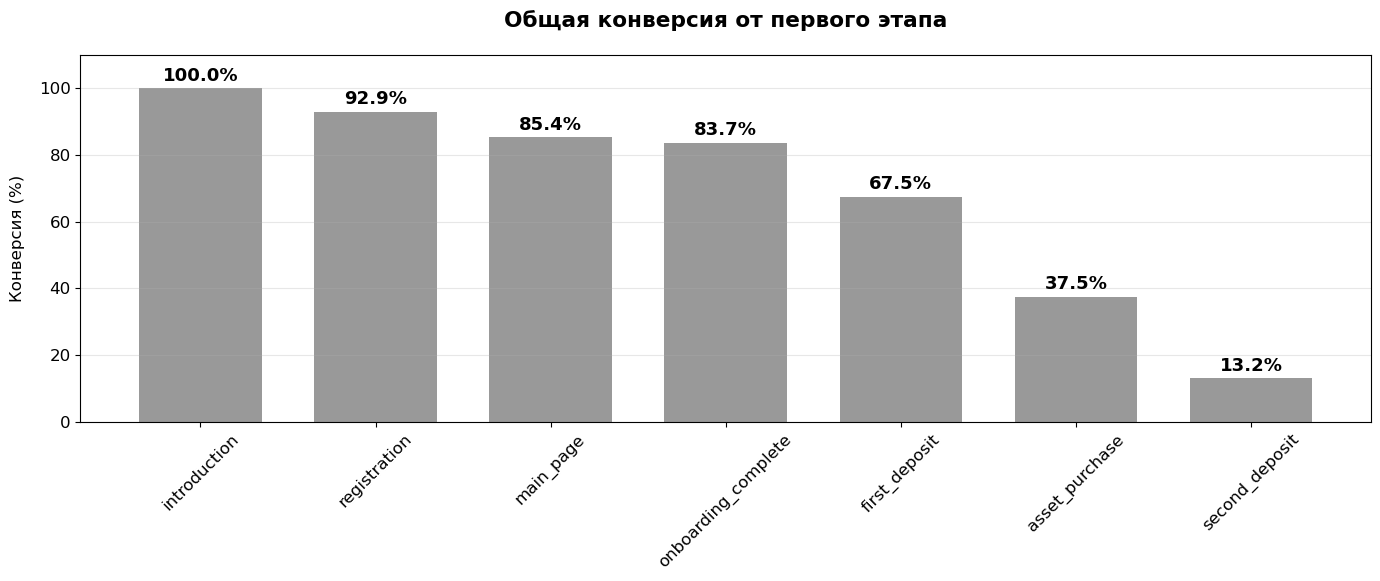

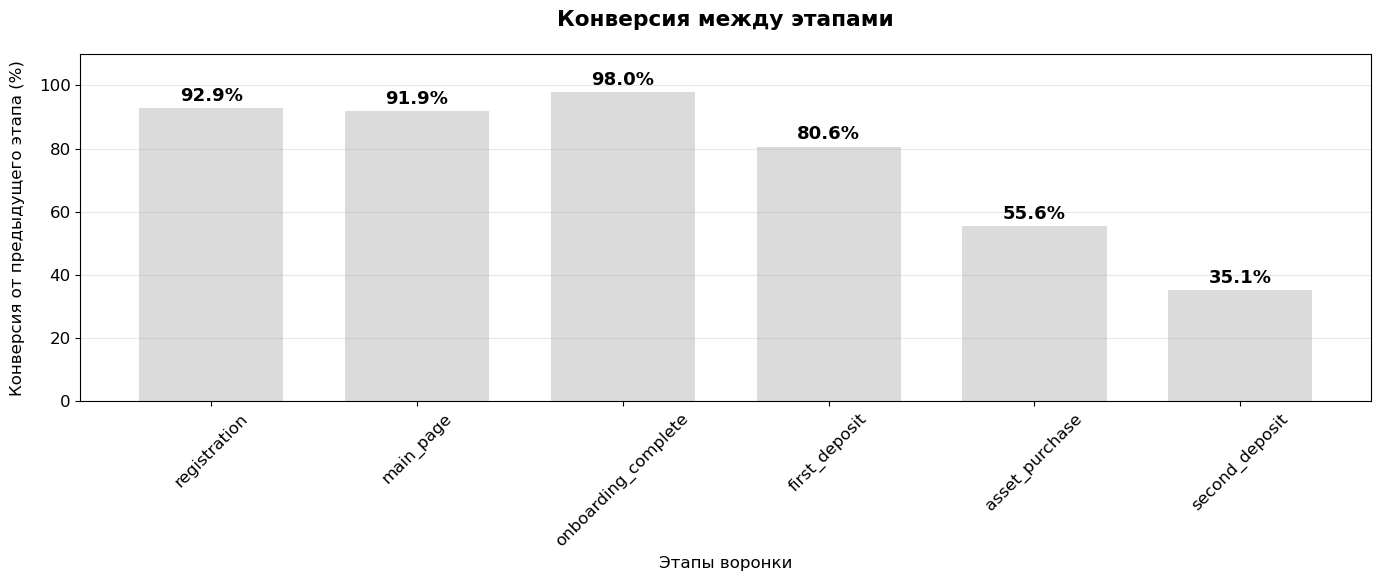

In [14]:
# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold', 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# 1. График общей конверсии
plt.figure(figsize=(14, 6))
bars = plt.bar(funnel_df['event_name'], funnel_df['conversion_from_first_%'],
              color='grey', alpha=0.8, width=0.7)

# подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=13,
            fontweight='bold') 

plt.title('Общая конверсия от первого этапа', pad=20)
#plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия (%)', labelpad=10)
plt.yticks()
plt.xticks(rotation=45)
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. График пошаговой конверсии
plt.figure(figsize=(14, 6))
bars = plt.bar(funnel_df['event_name'], funnel_df['conversion_from_previous_step_%'],
              color='lightgrey', alpha=0.8, width=0.7)

# подписи
for i, bar in enumerate(bars):
    if i == 0: continue
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=13,
            fontweight='bold')

plt.title('Конверсия между этапами', pad=20)
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от предыдущего этапа (%)', labelpad=10)
plt.xticks(rotation=45)
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Промежуточный вывод по воронкам

1. **Эффективность начальных этапов**:
   - Регистрация: 92,9% от открывших приложение
   - Переход к главной странице: 91,9% от зарегистрированных
   - Завершение онбординга: 98% от дошедших до главной страницы

2. **Проблемные зоны**:
   - **Главный разрыв**: После первого депозита теряется 44,4% пользователей (только 55,6% покупают активы)
   - **Вторичная проблема**: Низкая конверсия в повторное пополнение (35,1% от покупателей активов)

3. **Кумулятивные потери**:
   - От открытия приложения до покупки актива доходит лишь 37,5%
   - До второго депозита доходит только 13,2% от начального потока

**Ключевой инсайт**: Основной барьер продукта — переход от пополнения счета к первой инвестиции. Решение этой проблемы потенциально может увеличить общую конверсию в повторные депозиты в 2,5 раза (с 13,2% до 35,1% от потока).



**Задача 2.3.** Влияние уровня риска актива на открытие второго депозита.
- Изучим, как уровень риска первого актива влияет на конверсию во второй депозит.  

C:\Users\urize\AppData\Local\Temp\ipykernel_19968\4244973809.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hist['event_name']=='asset_purchase'].groupby(['risk'])['user_id'].nunique().reset_index(name='first_asset_users')
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\4244973809.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hist['event_name']=='second_deposit'].groupby(['risk'])['user_id'].nunique().reset_index(name='second_deposit_users')


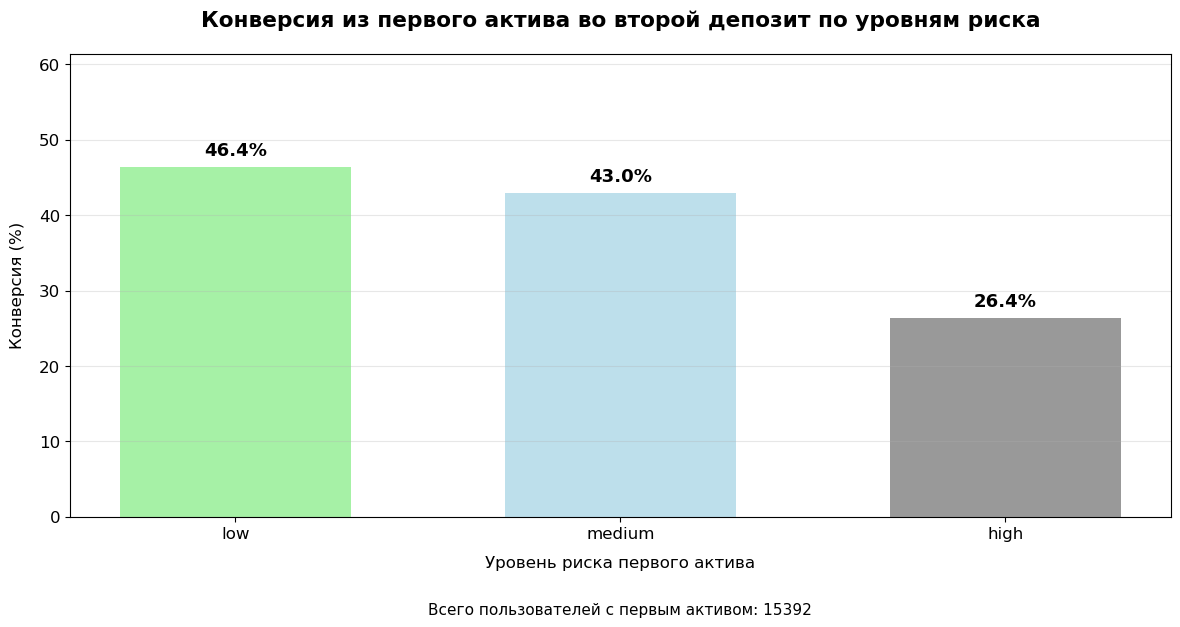

In [15]:
# Создадим столбец уровня риска покупки первого актива для каждого события
df_hist['risk'] = df_hist.groupby('user_id')['risk_level'].transform('first')

# Количество пользователей по уровням риска приобретших первый актив                    
first_asset_users = df_hist[
    df_hist['event_name']=='asset_purchase'].groupby(['risk'])['user_id'].nunique().reset_index(name='first_asset_users')

# Количество приобретших второй актив
second_deposit_users = df_hist[
    df_hist['event_name']=='second_deposit'].groupby(['risk'])['user_id'].nunique().reset_index(name='second_deposit_users')

# Объединяем и рассчитываем конверсию
cvr_risk = pd.merge(first_asset_users, second_deposit_users, on='risk')
cvr_risk['CVR_first_to_second_risk'] = 100*cvr_risk['second_deposit_users']/cvr_risk['first_asset_users']

# Упорядочиваем категории риска
risk_order = ['low', 'medium', 'high']
cvr_risk['risk'] = pd.Categorical(cvr_risk['risk'], categories=risk_order, ordered=True)
cvr_risk = cvr_risk.sort_values('risk')

# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold', 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Создаем график
plt.figure(figsize=(12, 6))
bars = plt.bar(cvr_risk['risk'], cvr_risk['CVR_first_to_second_risk'],
              color=['lightgreen', 'lightblue', 'grey'],  
              alpha=0.8, width=0.6)

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=13,
            fontweight='bold')

# Настройки графика
plt.title('Конверсия из первого актива во второй депозит по уровням риска', pad=20)
plt.xlabel('Уровень риска первого актива', labelpad=10)
plt.ylabel('Конверсия (%)', labelpad=10)
plt.xticks(rotation=0)
plt.ylim(0, cvr_risk['CVR_first_to_second_risk'].max() + 15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Добавляем информационную аннотацию
plt.annotate(f"Всего пользователей с первым активом: {cvr_risk['first_asset_users'].sum()}",
            xy=(0.5, -0.2), xycoords='axes fraction',
            ha='center', va='center', fontsize=11)

plt.show()

#### Промежуточный вывод о влиянии уровня риска актива на открытие второго депозита:

***Чем выше риск первого актива, тем ниже конверсия во второй депозит.***  
- **Low risk:** 46.4%  
- **Medium risk:** 43.0%  
- **High risk:** 26.4%   

**Особое внимание:**  
Пользователи, начавшие с **высокорисковых** активов, совершают повторные депозиты почти **вдвое реже** (разница 20 п.п.), чем выбравшие низкий риск. Это указывает на:  
1. Возможные потери и разочарование при рискованных инвестициях  
2. Более осторожное поведение после негативного опыта  
3. Важность грамотного онбординга для управления ожиданиями  

**Рекомендация:** Снижение барьеров для первых инвестиций в низкорисковые активы может повысить общую retention-метрику.

**Задача 2.4.** Анализ ключевой метрики на исторических данных.
- На исторических данных рассчитаем значение ключевой метрики — средней суммы всех депозитов на одного пользователя. Будем учитывать всех пользователей, которые взаимодействовали с сервисом. Это позволит зафиксировать базовый уровень монетизации.
- Визуализируем данные, где необходимо. По результатам исследовательского анализа сделаем краткий вывод. 

In [16]:
# Рассчитаем среднюю сумму всех депозитов на одного пользователя
ARPU_hist = df_hist['amount'].sum()/df_hist['user_id'].nunique()
print('Средняя сумма всех депозитов на пользователя по историческим данным, ARPU = ', ARPU_hist.round(1))

Средняя сумма всех депозитов на пользователя по историческим данным, ARPU =  91.6


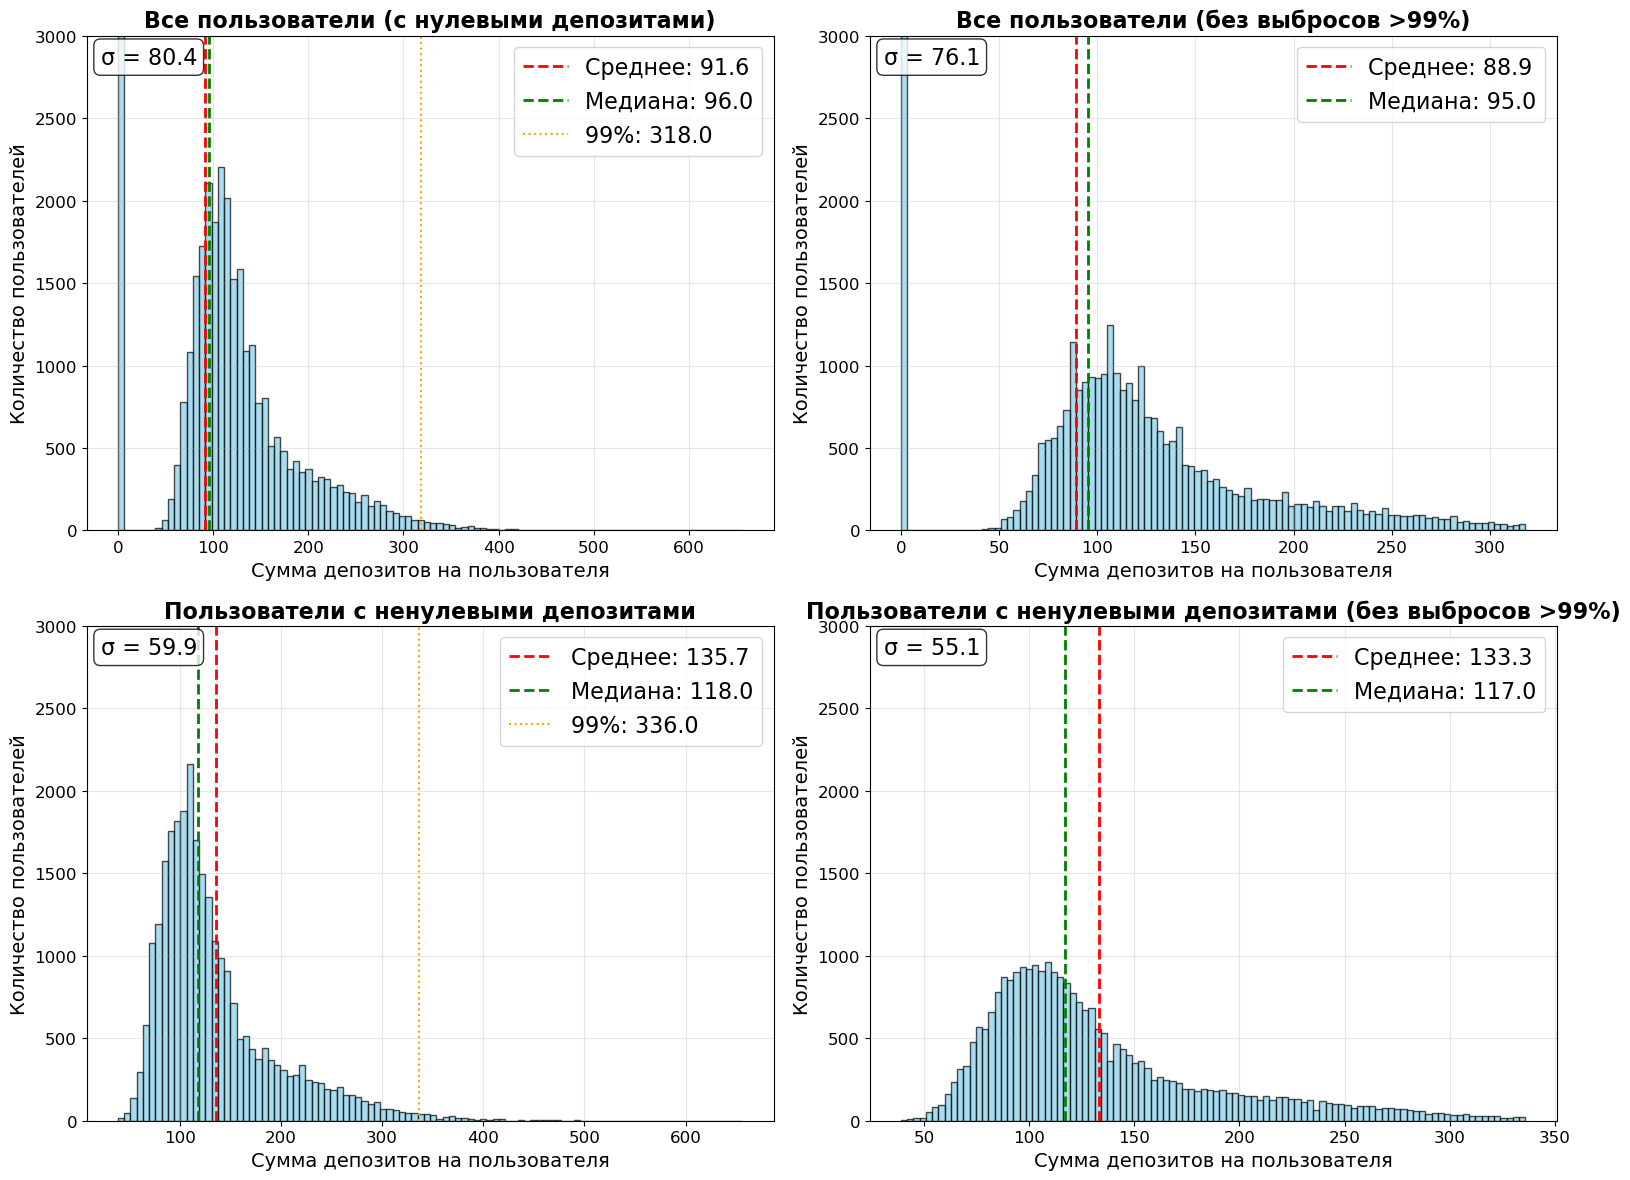

In [17]:
# Суммы депозитов по каждому пользователю
users_amounts = df_hist.groupby('user_id')['amount'].sum().reset_index()

# Пользователи с ненулевой суммой депозитов
users_non_zero = users_amounts[users_amounts['amount'] > 0]

# Рассчитываем статистики для всех пользователей
mean_amount = users_amounts['amount'].mean()
median_amount = users_amounts['amount'].median()
std_amount = users_amounts['amount'].std()
mean_median_diff_all = mean_amount - median_amount
percentile_99 = users_amounts['amount'].quantile(0.99)

# Рассчитываем статистики для пользователей с ненулевыми депозитами
mean_non_zero = users_non_zero['amount'].mean()
median_non_zero = users_non_zero['amount'].median()
std_non_zero = users_non_zero['amount'].std()
mean_median_diff_non_zero = mean_non_zero - median_non_zero
percentile_99_non_zero = users_non_zero['amount'].quantile(0.99)

# Создаем сетку 2x2 графиков
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Все пользователи - исходные данные
axes[0, 0].hist(users_amounts['amount'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Все пользователи (с нулевыми депозитами)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Сумма депозитов на пользователя', fontsize=14)
axes[0, 0].set_ylabel('Количество пользователей', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(mean_amount, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_amount:.1f}')
axes[0, 0].axvline(median_amount, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_amount:.1f}')
axes[0, 0].axvline(percentile_99, color='orange', linestyle=':', linewidth=1.5, label=f'99%: {percentile_99:.1f}')
axes[0, 0].text(0.02, 0.98, f'σ = {std_amount:.1f}', transform=axes[0, 0].transAxes, 
               fontsize=16, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[0, 0].set_ylim(0, 3000)
axes[0, 0].legend(fontsize=16)

# 2. Все пользователи - без выбросов (>99%)
users_amounts_filtered = users_amounts[users_amounts['amount'] <= percentile_99]
mean_filtered = users_amounts_filtered['amount'].mean()
median_filtered = users_amounts_filtered['amount'].median()
std_filtered = users_amounts_filtered['amount'].std()

axes[0, 1].hist(users_amounts_filtered['amount'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Все пользователи (без выбросов >99%)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Сумма депозитов на пользователя', fontsize=14)
axes[0, 1].set_ylabel('Количество пользователей', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(mean_filtered, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_filtered:.1f}')
axes[0, 1].axvline(median_filtered, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_filtered:.1f}')
axes[0, 1].text(0.02, 0.98, f'σ = {std_filtered:.1f}', transform=axes[0, 1].transAxes, 
               fontsize=16, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[0, 1].set_ylim(0, 3000)
axes[0, 1].legend(fontsize=16)

# 3. Пользователи с ненулевыми депозитами - исходные данные
axes[1, 0].hist(users_non_zero['amount'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Пользователи с ненулевыми депозитами', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Сумма депозитов на пользователя', fontsize=14)
axes[1, 0].set_ylabel('Количество пользователей', fontsize=14)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axvline(mean_non_zero, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_non_zero:.1f}')
axes[1, 0].axvline(median_non_zero, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_non_zero:.1f}')
axes[1, 0].axvline(percentile_99_non_zero, color='orange', linestyle=':', linewidth=1.5, label=f'99%: {percentile_99_non_zero:.1f}')
axes[1, 0].text(0.02, 0.98, f'σ = {std_non_zero:.1f}', transform=axes[1, 0].transAxes, 
               fontsize=16, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[1, 0].set_ylim(0, 3000)
axes[1, 0].legend(fontsize=16)

# 4. Пользователи с ненулевыми депозитами - без выбросов (>99%)
users_non_zero_filtered = users_non_zero[users_non_zero['amount'] <= percentile_99_non_zero]
mean_non_zero_filtered = users_non_zero_filtered['amount'].mean()
median_non_zero_filtered = users_non_zero_filtered['amount'].median()
std_non_zero_filtered = users_non_zero_filtered['amount'].std()

axes[1, 1].hist(users_non_zero_filtered['amount'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Пользователи с ненулевыми депозитами (без выбросов >99%)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Сумма депозитов на пользователя', fontsize=14)
axes[1, 1].set_ylabel('Количество пользователей', fontsize=14)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axvline(mean_non_zero_filtered, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_non_zero_filtered:.1f}')
axes[1, 1].axvline(median_non_zero_filtered, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_non_zero_filtered:.1f}')
axes[1, 1].text(0.02, 0.98, f'σ = {std_non_zero_filtered:.1f}', transform=axes[1, 1].transAxes, 
               fontsize=16, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[1, 1].set_ylim(0, 3000)
axes[1, 1].legend(fontsize=16)

plt.tight_layout()
plt.show()

```
╔══════════════════════════════════════════════╦══════════╦═════════╦═════════╗
║                   Группа                     ║ Среднее  ║ Медиана ║   Std   ║
╠══════════════════════════════════════════════╬══════════╬═════════╬═════════╣
║ Все пользователи                             ║   91.6   ║  96.0   ║  80.4   ║
║ Все пользователи (без выбросов >99%)         ║   88.9   ║  95.0   ║  76.1   ║
║ Пользователи с депозитами                    ║  135.7   ║ 118.0   ║  59.9   ║
║ Пользователи с депозитами (без выбросов >99%)║  133.3   ║ 117.0   ║  55.1   ║
╚══════════════════════════════════════════════╩══════════╩═════════╩═════════╝
```

По гистограммам видно, что близость значений медианы (96) и среднего (91.6) **для всех пользователей**, оказывается, обусловлена тем, что киты компенсируют неплатящих, выбросы справа уравновешивают выбросы слева. Распределение имеет правосторонний хвост и дискретный выброс нулевых значений (неплатящие).

- Все пользователи: Среднее < Медианы ← "левостороннее" распределение (за счет неплатящих)
- Платящие пользователи: Среднее > Медианы → правостороннее распределение (за счет китов)
- Высокая вариативность (CV > 40%) требует больших выборок для A/B тестов 


### **Итоговый вывод по исследовательскому анализу исторических данных**

1. **Стабильность базы**:
   - Приток новых пользователей стабилен (~662/день)
   - Отсутствие сезонности и трендов обеспечивает чистоту A/B-теста

2. **Критическая проблема продукта**:
   - **Главный барьер**: 44,4% пользователей не инвестируют средства после первого депозита
   - **Следствие**: Низкая конверсия во второй депозит (13,2% от общего потока)

3. **Ключевой инсайт о рисках**:
   - Выбор **высокорискового актива** для первой инвестиции снижает конверсию во второй депозит **в 1,8 раза** (26,4% vs 46,4% для low-risk)
   - Пользователи теряют доверие/средства при рискованных вложениях без подготовки

4. **Монетизация**:
   - Средний доход на пользователя (ARPU) = $91.6
   - Высокая вариативность (CV > 40%) требует больших выборок для AB теста.
   - Резерв роста: увеличение доли low-risk инвестиций может повысить ARPU через повторные депозиты

**Рекомендация для A/B-теста**:  
Новый онбординг должен не только объяснять риски, но **активно направлять новичков к low-risk активам**, чтобы:
- Снизить первоначальные потери  
- Повысить доверие и вовлеченность  
- Увеличить конверсию в повторные депозиты  

**Ожидаемый эффект**: Рост конверсии в second_deposit с 13,2% до 30-35% при сохранении объема первого депозита.

---

## Часть

###  Исследование результатов А/В эксперимента
Загрузим данные с результатами эксперимента (датасет `/datasets/pa_sollmafin_abt.csv `). Проверим корректность данных и проведем предобработку. Зафиксируем основную информацию о данных и предобработке в кратком промежуточном выводе.
Затем проведем анализ результатов А/В-эксперимента.


In [18]:
# Загрузим данные и парсируем временные поля
df = pd.read_csv(
    'https://code.s3.yandex.net/datasets/pa_sollmafin_abt.csv', parse_dates = (['first_ts', 'first_dt', 'event_ts']))

In [19]:
# Изучаем данные
display(df.head())
df.info()

,user_id,country_code,platform,first_ts,first_dt,event_ts,event_name,ab_test,group,amount,asset,risk_level
0,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:51,install / open_web,onboarding_test,test,NaN,NaN,NaN
1,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-07 19:55:54,introduction,onboarding_test,test,NaN,NaN,NaN
2,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:09,registration,onboarding_test,test,NaN,NaN,NaN
3,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:18:13,main_page,onboarding_test,test,NaN,NaN,NaN
4,c430acb5-c6bf-43cf-8e2d-7ab9ce0d2c8a,BR,mobile,2025-06-07 19:55:51,2025-06-07,2025-06-08 06:33:40,onboarding_complete,onboarding_test,test,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       54805 non-null  object        
 1   country_code  54805 non-null  object        
 2   platform      54805 non-null  object        
 3   first_ts      54805 non-null  datetime64[ns]
 4   first_dt      54805 non-null  datetime64[ns]
 5   event_ts      54805 non-null  datetime64[ns]
 6   event_name    54805 non-null  object        
 7   ab_test       54805 non-null  object        
 8   group         54805 non-null  object        
 9   amount        7843 non-null   float64       
 10  asset         3750 non-null   object        
 11  risk_level    3750 non-null   object        
dtypes: datetime64[ns](3), float64(1), object(8)
memory usage: 5.0+ MB


Датасет df_hist содержит информацию об активности пользователей в приложении и состоит из 54805 строк в 12 столбцах.

In [20]:
# Оптимизируем тип данных числового столбца
df['amount'] = pd.to_numeric(df['amount'], downcast='float')

In [21]:
# Функция оптимизации object в category
def optimize_dtypes(df):
    # Оптимизация целочисленных колонок
    obj_cols = ['platform', 'country_code', 'risk_level', 'asset', 'event_name', 'ab_test', 'group']
    for col in obj_cols:
        df[col] = df[col].astype('category')
    return df
# Применяем функцию
df = optimize_dtypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54805 entries, 0 to 54804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       54805 non-null  object        
 1   country_code  54805 non-null  category      
 2   platform      54805 non-null  category      
 3   first_ts      54805 non-null  datetime64[ns]
 4   first_dt      54805 non-null  datetime64[ns]
 5   event_ts      54805 non-null  datetime64[ns]
 6   event_name    54805 non-null  category      
 7   ab_test       54805 non-null  category      
 8   group         54805 non-null  category      
 9   amount        7843 non-null   float32       
 10  asset         3750 non-null   category      
 11  risk_level    3750 non-null   category      
dtypes: category(7), datetime64[ns](3), float32(1), object(1)
memory usage: 2.2+ MB


Категориальные данные приведены к соответствующему типу, что позволило в 2 раза уменьшить затраты ресурса памяти.

In [22]:
# Считаем пропуски
missing_df = (pd.DataFrame({'Кол-во пропусков': df.isnull().sum(), 
                                        'Процент пропусков': round(df.isnull().mean().round(5), 3)*100}).sort_values(by='Кол-во пропусков', ascending=False)
           .style.background_gradient(cmap='Greys'))
missing_df

,Кол-во пропусков,Процент пропусков
asset,51055,93.200000
risk_level,51055,93.200000
amount,46962,85.700000
user_id,0,0.000000
country_code,0,0.000000
platform,0,0.000000
first_ts,0,0.000000
first_dt,0,0.000000
event_ts,0,0.000000
event_name,0,0.000000


 Пропуски обусловлены бизнес логикой

In [23]:
# Смотрим есть ли еще AB тесты 
df['ab_test'].value_counts()

ab_test
onboarding_test    54805
Name: count, dtype: int64

Все данные относятся к текущему AB тесту `onboarding_test`    

In [24]:
# Посмотрим в каком периоде представлены данные
print("Диапазон дат появления новых пользователей:",
      df['first_dt'].dt.date.min(), "-", df['first_dt'].dt.date.max())
print("Диапазон дат всех действий пользователей:",
      df['event_ts'].dt.date.min(), "-", df['event_ts'].dt.date.max())

Диапазон дат появления новых пользователей: 2025-06-02 - 2025-06-15
Диапазон дат всех действий пользователей: 2025-06-02 - 2025-06-22


In [25]:
# Проверяем наличие явных дубликатов
print(df.duplicated().sum())

0


In [26]:
# Проверяем наличие неявных дубликатов с одинаковыми пользователями  и временем события
print(df[['user_id', 'event_ts']].duplicated().sum())

0


In [27]:
# Посмотрим общее количество уникальных пользователей, типы платформ, страны, типы событий
print('Общее число уникальных пользователей', df['user_id'].nunique())
print('Платформы\n',
      df['platform'].unique())
print('Коды стран\n', df['country_code'].unique())
print('Типы событий\n', df['event_name'].unique())

Общее число уникальных пользователей 9415
Платформы
 ['mobile', 'web']
Categories (2, object): ['mobile', 'web']
Коды стран
 ['BR', 'MX', 'CO', 'AR']
Categories (4, object): ['AR', 'BR', 'CO', 'MX']
Типы событий
 ['install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit']
Categories (8, object): ['asset_purchase', 'first_deposit', 'install / open_web', 'introduction', 'main_page', 'onboarding_complete', 'registration', 'second_deposit']


In [28]:
# Выведем статистику сумм депозитов
df['amount'].describe()

count    7843.000000
mean      109.620682
std        86.604538
min        25.000000
25%        62.000000
50%        97.000000
75%       130.500000
max      1050.000000
Name: amount, dtype: float64

Минимальный депозит 25 (27 ист.), максимальный 1050 (524 ист.). Среднее значение 110 (114 ист.) близко к медиане 97 (109 ист.), распределение по-видимому нормально-подобное со сдвигом среднего в область низких значений. Ожидается правосторонний хвост в виде выбросов.

####  Промежуточный вывод

 **Загрузка и предобработка данных завершена**. 
 
Получен датасет `df` с информацией о пользователях, их поведении и финансовыми данными в рамках настоящего AB теста

🔍 Анализ и предобработка:
- ✔️ Названия корректны  
- ✔️ Типы данных преобразованы и оптимизированы
- ✔️ Наличие пропусков системно и отражает бизнес-логику сервиса  
- ✔️ Явных и неявных дубликатов нет 
- ✔️ Аномальных значений не зафиксировано
- ✔️ Период набора пользователей `2025-06-02` - `2025-06-15`
- ✔️ Преиод событий `2025-06-02` - `2025-06-22`
- ✔️ Число уникальных пользователей: 9415
- ✔️ Типы платформ: Mobile, Web
- ✔️ Коды стран: 'BR', 'AR', 'CO', 'MX' 
- ✔️ Типы событий: install / open_web', 'introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit 

✅ Данные позволяют проводить дальнейший анализ

**Задача 3.1.** Анализ аудитории эксперимента. 
- Проверим корректность распределения новых пользователей по группам А/В-эксперимента. 
- Построим графики и сформулируем промежуточный вывод. 

In [29]:
# Смотрим пересечения пользователей
# Считаем кол-во уникальных групп на user_id
flawed_users = df.groupby('user_id')['group'].nunique().reset_index()
# Фильтруем клиентов у которых больше 1 группы
flawed_users = flawed_users[flawed_users['group']>1]
if len(flawed_users) > 0:
    print(f"Найдено {len(flawed_users)} пользователей в обеих группах!")
    print("Их нужно исключить из анализа:")
    print(flawed_users['user_id'].tolist())
else:
    print("Пересечений пользователей между группами не найдено! ✅")

Пересечений пользователей между группами не найдено! ✅


C:\Users\urize\AppData\Local\Temp\ipykernel_19968\3049155378.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby('group')['user_id'].nunique()


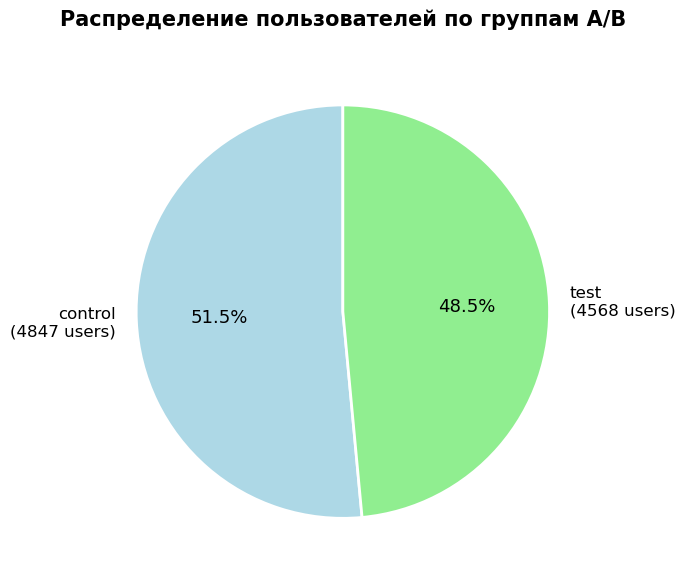

C:\Users\urize\AppData\Local\Temp\ipykernel_19968\3049155378.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a_country = group_a.groupby('country_code')['user_id'].nunique()
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\3049155378.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b_country = group_b.groupby('country_code')['user_id'].nunique()
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\3049155378.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt

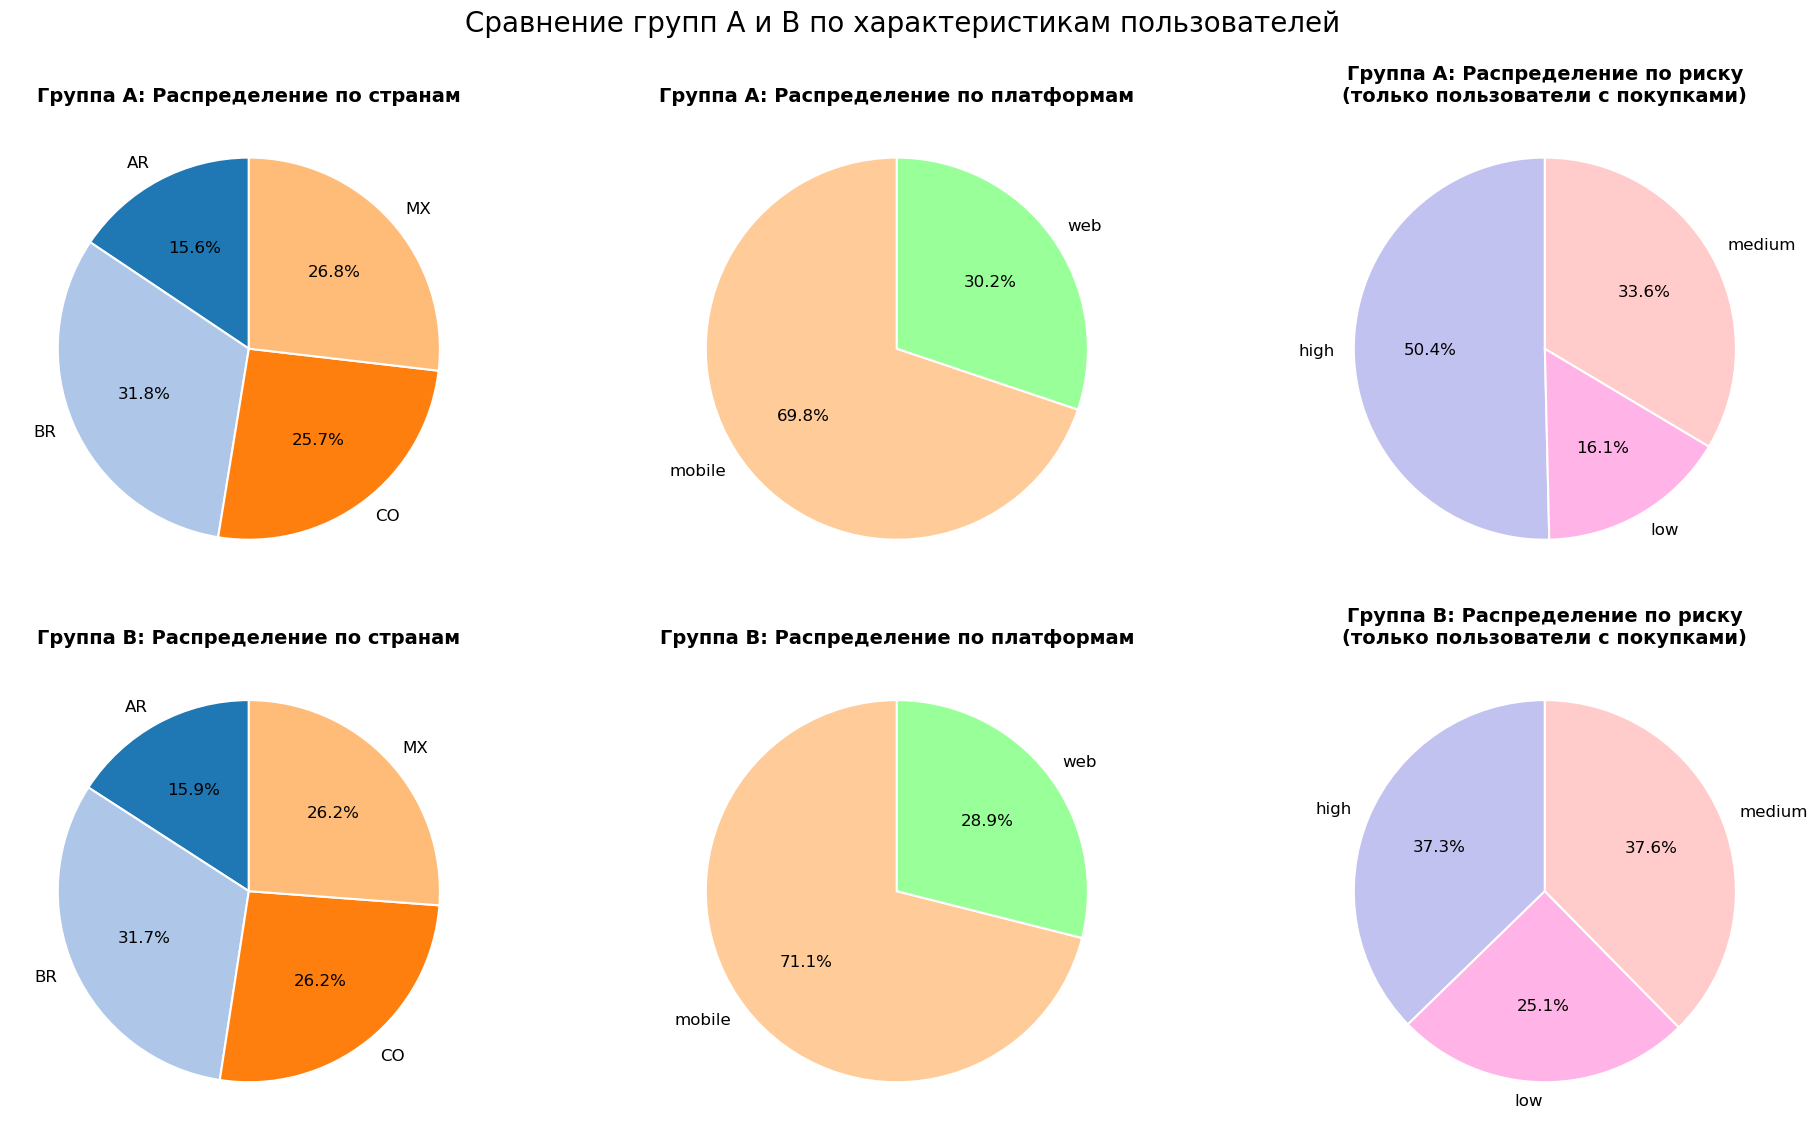

In [30]:
# 1. Общее распределение по группам A/Bи
plt.figure(figsize=(10, 6))
group_counts = df.groupby('group')['user_id'].nunique()

# Создаем подписи с абсолютными значениями и процентами
labels = [f'{group}\n({count} users)' 
          for group, count, percent in zip(group_counts.index, 
                                          group_counts.values, 
                                          group_counts.values / group_counts.sum() * 100)]

plt.pie(group_counts.values, 
        labels=labels,
        autopct='%1.1f%%',
        colors=['lightblue','lightgreen'],
        startangle=90,
        wedgeprops={'edgecolor': 'w', 'linewidth': 2})
plt.title('Распределение пользователей по группам A/B', fontsize=15, pad=20)
plt.tight_layout()
plt.show()

# 2. Сравнительные диаграммы по странам, платформам и рискам
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Настройки для всех диаграмм
plot_config = {
    'autopct': '%1.1f%%',
    'startangle': 90,
    'wedgeprops': {'edgecolor': 'w', 'linewidth': 1.5},
    'textprops': {'fontsize': 12}
}

# Для группы A
group_a = df[df['group'] == 'control']
# Для группы B
group_b = df[df['group'] == 'test']

# Диаграммы по странам
country_palette = plt.cm.tab20.colors
a_country = group_a.groupby('country_code')['user_id'].nunique()
b_country = group_b.groupby('country_code')['user_id'].nunique()

axes[0, 0].pie(a_country, labels=a_country.index, colors=country_palette, **plot_config)
axes[0, 0].set_title('Группа A: Распределение по странам', fontsize=14)

axes[1, 0].pie(b_country, labels=b_country.index, colors=country_palette, **plot_config)
axes[1, 0].set_title('Группа B: Распределение по странам', fontsize=14)

# Диаграммы по платформам
platform_palette = ['#ffcc99', '#99ff99']
a_platform = group_a.groupby('platform')['user_id'].nunique()
b_platform = group_b.groupby('platform')['user_id'].nunique()

axes[0, 1].pie(a_platform, labels=a_platform.index, colors=platform_palette, **plot_config)
axes[0, 1].set_title('Группа A: Распределение по платформам', fontsize=14)

axes[1, 1].pie(b_platform, labels=b_platform.index, colors=platform_palette, **plot_config)
axes[1, 1].set_title('Группа B: Распределение по платформам', fontsize=14)

# Диаграммы по уровню риска
risk_palette = ['#c2c2f0', '#ffb3e6', '#ffcccb']
a_risk = group_a.groupby('risk_level')['user_id'].nunique()
b_risk = group_b.groupby('risk_level')['user_id'].nunique()

axes[0, 2].pie(a_risk, labels=a_risk.index, colors=risk_palette, **plot_config)
axes[0, 2].set_title('Группа A: Распределение по риску\n(только пользователи с покупками)', fontsize=14)

axes[1, 2].pie(b_risk, labels=b_risk.index, colors=risk_palette, **plot_config)
axes[1, 2].set_title('Группа B: Распределение по риску\n(только пользователи с покупками)', fontsize=14)

# Общий заголовок
plt.suptitle('Сравнение групп A и B по характеристикам пользователей', fontsize=20, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [31]:
# 1. Получаем размеры выборок
group_counts = df.groupby('group')['user_id'].nunique()
count_a = group_counts['control']  
count_b = group_counts['test'] 

# 2. Проводим Z-тест пропорций
# H0: пропорции равны (p1 = p2)
# H1: пропорции различны (p1 ≠ p2)

# Общее количество наблюдений
nobs = [(count_a + count_b), (count_a + count_b)]

# Количество "успехов" (в данном случае просто размеры групп)
count = [count_a, count_b]

# Z-тест для сравнения пропорций
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print("📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ РАЗМЕРОВ ВЫБОРОК")
print("=" * 50)
print('ГИПОТЕЗЫ\nH0: размеры выборок A и B равны (p1 = p2)\nH1: размеры выборок A и B различны (p1 ≠ p2)')
print(f"Группа A: {count_a} пользователей")
print(f"Группа B: {count_b} пользователей")
print(f"Общее количество: {count_a + count_b} пользователей")
print(f"Доля группы A: {count_a/(count_a + count_b):.3f}")
print(f"Доля группы B: {count_b/(count_a + count_b):.3f}")
print("-" * 50)
print(f"Z-статистика: {z_stat:.4f}")
print(f"P-значение: {p_value:.6f}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("✅ Статистически значимая разница в размерах выборок (p < 0.05)")
else:
    print("❌ Нет статистически значимой разницы в размерах выборок (p ≥ 0.05)")
    print("Размеры выборок можно считать одинаковыми")

📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ РАЗМЕРОВ ВЫБОРОК
ГИПОТЕЗЫ
H0: размеры выборок A и B равны (p1 = p2)
H1: размеры выборок A и B различны (p1 ≠ p2)
Группа A: 4847 пользователей
Группа B: 4568 пользователей
Общее количество: 9415 пользователей
Доля группы A: 0.515
Доля группы B: 0.485
--------------------------------------------------
Z-статистика: 4.0664
P-значение: 0.000048
✅ Статистически значимая разница в размерах выборок (p < 0.05)


C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2300994445.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby('group')['user_id'].nunique()


#### Промежуточный вывод по анализу аудитории эксперимента:
Распределение пользователей между группами статистически значимо различное, но приемлемое, обнаружено **значительное изменение в риск-профиле** тестовой группы.
- ✅ **Распределение по группам**: группа A - контрольная 51.5% (4847), группа B - тестовая 48.5% (4568)
- ✅ **Распределение по странам и платформам**: сбалансировано
- ⚠️ **Распределение по рискам**: 
  - **Контроль (A)**: 50.4% high-risk (типичный паттерн)
  - **Тест (B)**: 37.3% high-risk (-13.1 п.п.), рост low-risk (+9 п.п.) и medium-risk (+4 п.п.)

**Вывод**: Новый онбординг эффективно смещает пользователей от высокорисковых к более консервативным стратегиям, что соответствует целям эксперимента.

**Задача 3.2.** Сравнение воронок событий.
- Сравним пользовательский путь новых пользователей в тестовой и контрольной группах.
- Построим классическую и последовательную воронки, выполним визуализацию и сделаем промежуточный вывод. 

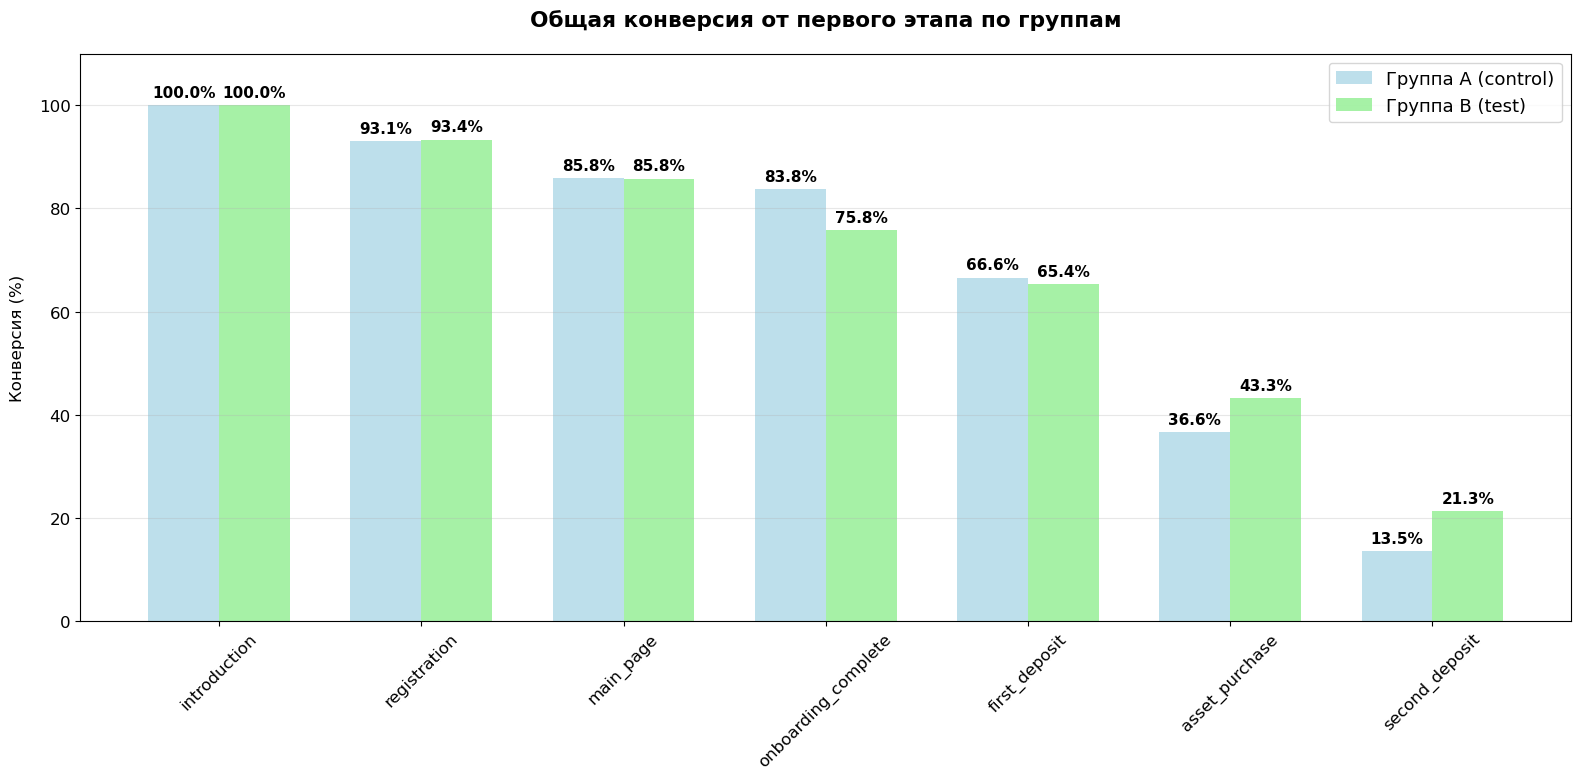

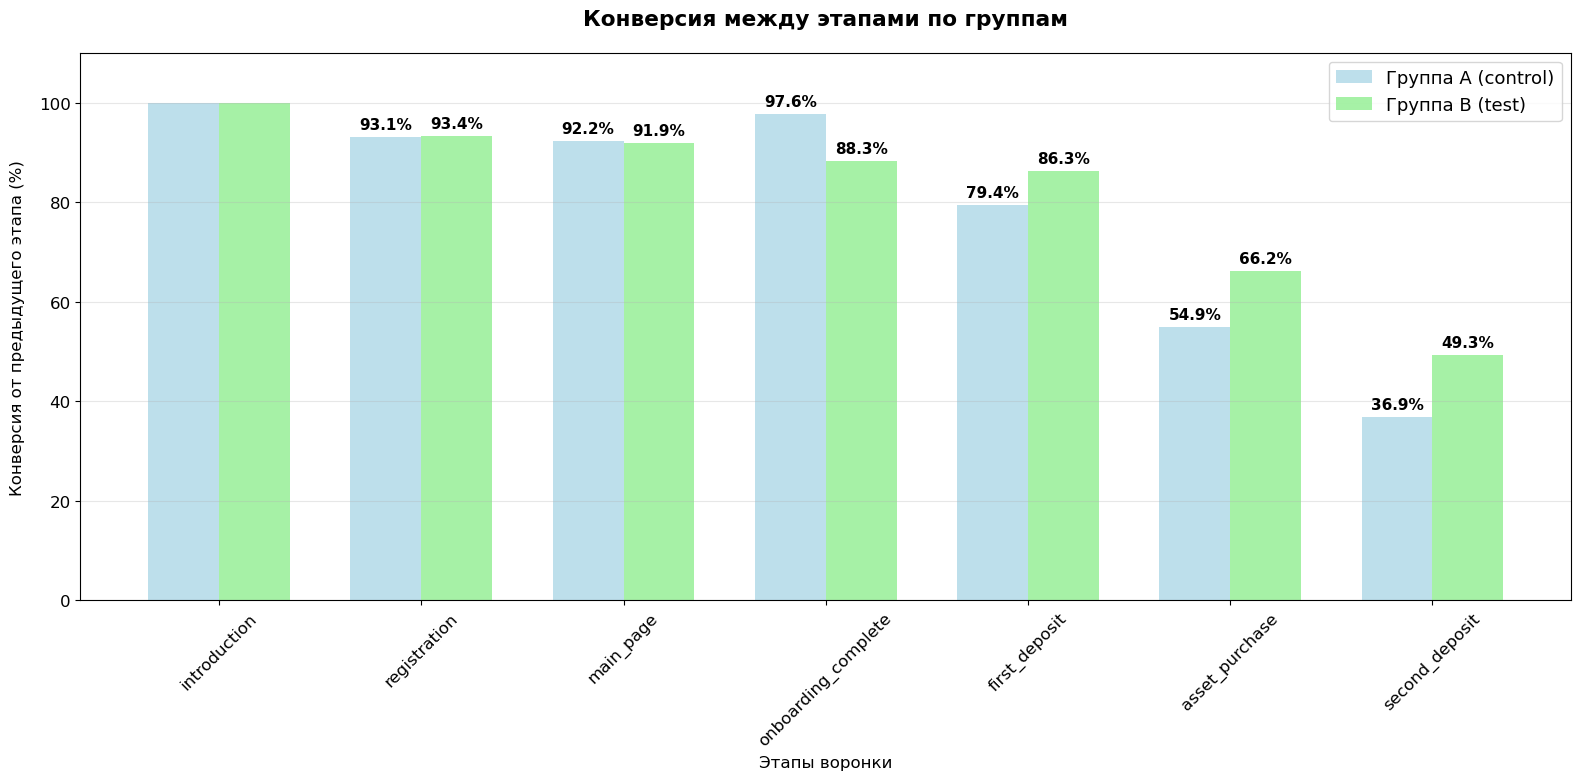

Численные значения конверсии:


,event,control_total_%,test_total_%,control_step_%,test_step_%
0,introduction,100.0,100.0,100.0,100.0
1,registration,93.1,93.4,93.1,93.4
2,main_page,85.8,85.8,92.2,91.9
3,onboarding_complete,83.8,75.8,97.6,88.3
4,first_deposit,66.6,65.4,79.4,86.3
5,asset_purchase,36.6,43.3,54.9,66.2
6,second_deposit,13.5,21.3,36.9,49.3


In [32]:
# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold', 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Создаем отдельные воронки для каждой группы
funnel_a = df[df['group'] == 'control']
funnel_b = df[df['group'] == 'test']

# Функция для расчета воронки
def calculate_funnel(group_df, group_name):
    funnel_data = []
    events = ['introduction', 'registration', 'main_page', 'onboarding_complete', 'first_deposit', 'asset_purchase', 'second_deposit']
    
    for event in events:
        users_count = group_df[group_df['event_name'] == event]['user_id'].nunique()
        funnel_data.append({'event_name': event, 'users_count': users_count, 'group': group_name})
    
    funnel_df = pd.DataFrame(funnel_data)
    funnel_df['conversion_from_first_%'] = funnel_df['users_count'] / funnel_df['users_count'].iloc[0] * 100
    funnel_df['conversion_from_previous_step_%'] = funnel_df['users_count'] / funnel_df['users_count'].shift(1) * 100
    funnel_df.loc[0, 'conversion_from_previous_step_%'] = 100  # Используем loc вместо iloc
    return funnel_df

# Рассчитываем воронки для обеих групп
funnel_a_df = calculate_funnel(funnel_a, 'control')
funnel_b_df = calculate_funnel(funnel_b, 'test')

# 1. График общей конверсии от первого этапа
plt.figure(figsize=(16, 8))
x = np.arange(len(funnel_a_df['event_name']))
width = 0.35

bars_a = plt.bar(x - width/2, funnel_a_df['conversion_from_first_%'], 
                width, color='lightblue', alpha=0.8, label='Группа A (control)')
bars_b = plt.bar(x + width/2, funnel_b_df['conversion_from_first_%'], 
                width, color='lightgreen', alpha=0.8, label='Группа B (test)')

# Подписи значений для группы A
for bar in bars_a:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=11,
            fontweight='bold')

# Подписи значений для группы B
for bar in bars_b:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=11,
            fontweight='bold')

plt.title('Общая конверсия от первого этапа по группам', pad=20)
plt.ylabel('Конверсия (%)', labelpad=10)
plt.xticks(x, funnel_a_df['event_name'], rotation=45)
plt.ylim(0, 110)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. График пошаговой конверсии
plt.figure(figsize=(16, 8))
bars_a_step = plt.bar(x - width/2, funnel_a_df['conversion_from_previous_step_%'], 
                     width, color='lightblue', alpha=0.8, label='Группа A (control)')
bars_b_step = plt.bar(x + width/2, funnel_b_df['conversion_from_previous_step_%'], 
                     width, color='lightgreen', alpha=0.8, label='Группа B (test)')

# Подписи значений (пропускаем первый этап)
for i, bar in enumerate(bars_a_step):
    if i == 0: continue
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=11,
            fontweight='bold')

for i, bar in enumerate(bars_b_step):
    if i == 0: continue
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=11,
            fontweight='bold')

plt.title('Конверсия между этапами по группам', pad=20)
plt.xlabel('Этапы воронки')
plt.ylabel('Конверсия от предыдущего этапа (%)', labelpad=10)
plt.xticks(x, funnel_a_df['event_name'], rotation=45)
plt.ylim(0, 110)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Выводим численные значения для анализа
print("Численные значения конверсии:")
comparison_df = pd.DataFrame({
    'event': funnel_a_df['event_name'],
    'control_total_%': funnel_a_df['conversion_from_first_%'].round(1),
    'test_total_%': funnel_b_df['conversion_from_first_%'].round(1),
    'control_step_%': funnel_a_df['conversion_from_previous_step_%'].round(1),
    'test_step_%': funnel_b_df['conversion_from_previous_step_%'].round(1)
})
display(comparison_df)

#### Промежуточный вывод по воронке A/B теста:

 🔍 **Ключевые изменения в тестовой группе:**

1. **✅ Успех онбординга:** 
   - Рост конверсии в покупку актива: **+6.7 п.п.** (36.6% → 43.3%)
   - Удвоение конверсии во второй депозит: **+7.8 п.п.** (13.5% → 21.3%)
   
1. **⚠️ Проблема онбординга:**
   - **Значительная потеря на этапе онбординга:** -9.3 п.п. (97.6% → 88.3%)
   - Пользователи тестовой группы чаще прерываются на обучающем этапе

2. **📊 Значимые улучшения:**
   - **Asset purchase → Second deposit:** +12.4 п.п. (36.9% → 49.3%)
   - **First deposit → Asset purchase:** +11.3 п.п. (54.9% → 66.2%)

3. **⚡️ Изменение паттерна поведения:**
   - Несмотря на сложности с онбордингом, пользователи лучше понимают инвестиции
   - Увеличилась **лояльность** - больше повторных депозитов

4. **💰 Бизнес-эффект:**
   - **Рост повторных депозитов на 57%** (относительное увеличение)
   - Улучшение монетизации за счет большего удержания инвесторов

**Вывод:** Есть основания предполагать, что новый онбординг, хотя и вызывает первоначальные потери (возможно из-за сложности или длины), в долгосрочной перспективе значительно улучшает инвестиционное поведение пользователей. 
**Требуется оптимизация онбординга** для снижения оттока, но концепция обучения похоже работает.

**Задача 3.3.** Влияние новой фичи на конверсию во второй депозит с учётом уровня риска купленного актива.
- Проанализируем, как категория риска купленного актива влияет на вероятность открытия второго депозита в тестовой и контрольной группах. 
- Сравним результаты и оценим, есть ли статистически значимая разница между группами. 

C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2906404625.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['event_name']=='asset_purchase'].groupby(['risk', 'group'])['user_id'].nunique().reset_index(name='first_asset_users')
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2906404625.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['event_name']=='second_deposit'].groupby(['risk', 'group'])['user_id'].nunique().reset_index(name='second_deposit_users')


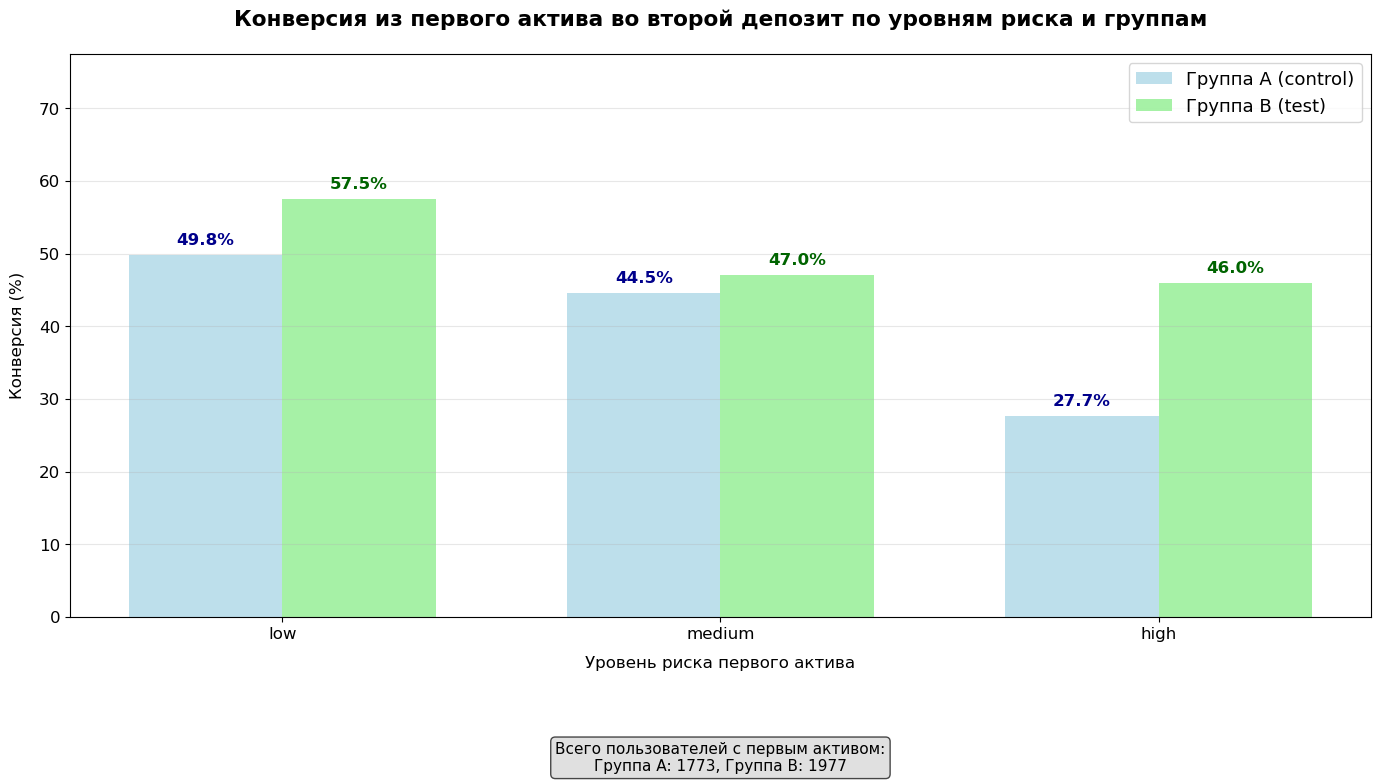

Численные значения конверсии по рискам и группам:


,risk,group,first_asset_users,second_deposit_users,CVR_first_to_second_risk
2,low,control,285,142,49.824561
3,low,test,496,285,57.459677
4,medium,control,595,265,44.537815
5,medium,test,744,350,47.043011
0,high,control,893,247,27.659574
1,high,test,737,339,45.997286


In [33]:
# Создадим столбец уровня риска покупки первого актива для каждого события
df['risk'] = df.groupby('user_id')['risk_level'].transform('first')

# Количество пользователей по уровням риска и группам приобретших первый актив                    
first_asset_users = df[
    df['event_name']=='asset_purchase'].groupby(['risk', 'group'])['user_id'].nunique().reset_index(name='first_asset_users')

# Из этих пользователей их количество приобретших второй актив
second_deposit_users = df[
    df['event_name']=='second_deposit'].groupby(['risk', 'group'])['user_id'].nunique().reset_index(name='second_deposit_users')

# Объединяем и рассчитываем конверсию
cvr_risk_group = pd.merge(first_asset_users, second_deposit_users, on=['risk', 'group'])
cvr_risk_group['CVR_first_to_second_risk'] = 100 * cvr_risk_group['second_deposit_users'] / cvr_risk_group['first_asset_users']

# Упорядочиваем категории риска
risk_order = ['low', 'medium', 'high']
cvr_risk_group['risk'] = pd.Categorical(cvr_risk_group['risk'], categories=risk_order, ordered=True)
cvr_risk_group = cvr_risk_group.sort_values(['risk', 'group'])

# Разделяем данные по группам
cvr_control = cvr_risk_group[cvr_risk_group['group'] == 'control']
cvr_test = cvr_risk_group[cvr_risk_group['group'] == 'test']

# Настройки стиля
plt.style.use('default')
plt.rcParams.update({
    'font.size': 13,
    'axes.labelsize': 12,
    'axes.titleweight': 'bold', 
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Создаем график
plt.figure(figsize=(14, 7))
x = np.arange(len(risk_order))
width = 0.35

bars_control = plt.bar(x - width/2, cvr_control['CVR_first_to_second_risk'], 
                      width, color='lightblue', alpha=0.8, label='Группа A (control)')
bars_test = plt.bar(x + width/2, cvr_test['CVR_first_to_second_risk'], 
                   width, color='lightgreen', alpha=0.8, label='Группа B (test)')

# Добавляем подписи значений
for bar in bars_control:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=12,
            fontweight='bold',
            color='darkblue')

for bar in bars_test:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=12,
            fontweight='bold',
            color='darkgreen')

# Настройки графика
plt.title('Конверсия из первого актива во второй депозит по уровням риска и группам', pad=20)
plt.xlabel('Уровень риска первого актива', labelpad=10)
plt.ylabel('Конверсия (%)', labelpad=10)
plt.xticks(x, risk_order)
plt.ylim(0, cvr_risk_group['CVR_first_to_second_risk'].max() + 20)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Добавляем информационные аннотации
total_control = cvr_control['first_asset_users'].sum()
total_test = cvr_test['first_asset_users'].sum()
plt.annotate(f"Всего пользователей с первым активом:\nГруппа A: {total_control}, Группа B: {total_test}",
            xy=(0.5, -0.25), xycoords='axes fraction',
            ha='center', va='center', fontsize=11,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))

plt.show()

# Выводим численные значения для анализа
print("Численные значения конверсии по рискам и группам:")
display(cvr_risk_group[['risk', 'group', 'first_asset_users', 'second_deposit_users', 'CVR_first_to_second_risk']])

In [34]:
print("📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ КОНВЕРСИЙ ИЗ ПЕРВОГО АКТИВА ВО ВТОРОЙ ДЕПОЗИТ ПО ГРУППАМ")
print("=" * 70)
print('ГИПОТЕЗЫ\nH0: конверсии в группах A и B равны (p1 = p2)\nH1: конверсии в группах A и B различны (p1 ≠ p2)')
print("=" * 70)
print("Статистическая значимость различий между группами:")
print("=" * 70)

for risk_level in cvr_risk_group['risk'].unique():
    # Данные для контрольной группы
    control_data = cvr_risk_group[(cvr_risk_group['risk'] == risk_level) & 
                                 (cvr_risk_group['group'] == 'control')].iloc[0]
    # Данные для тестовой группы
    test_data = cvr_risk_group[(cvr_risk_group['risk'] == risk_level) & 
                              (cvr_risk_group['group'] == 'test')].iloc[0]
    
    # Прямой вызов proportions_ztest
    count = np.array([control_data['second_deposit_users'], test_data['second_deposit_users']])
    nobs = np.array([control_data['first_asset_users'], test_data['first_asset_users']])
    
    z_score, p_value = proportions_ztest(count, nobs, alternative='two-sided')
    
    # Определяем значимость
    if p_value < 0.001:
        significance = "ВЫСОКОЗНАЧИМО (p < 0.001) 💪"
    elif p_value < 0.01:
        significance = "ЗНАЧИМО (p < 0.01) ✅"
    elif p_value < 0.05:
        significance = "ЗНАЧИМО (p < 0.05) ✅"
    else:
        significance = "НЕ ЗНАЧИМО (p ≥ 0.05) ❌"
    
    print(f"{risk_level.upper()} риск: p-value = {p_value:.6f} - {significance}")

📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ КОНВЕРСИЙ ИЗ ПЕРВОГО АКТИВА ВО ВТОРОЙ ДЕПОЗИТ ПО ГРУППАМ
ГИПОТЕЗЫ
H0: конверсии в группах A и B равны (p1 = p2)
H1: конверсии в группах A и B различны (p1 ≠ p2)
Статистическая значимость различий между группами:
LOW риск: p-value = 0.039072 - ЗНАЧИМО (p < 0.05) ✅
MEDIUM риск: p-value = 0.360690 - НЕ ЗНАЧИМО (p ≥ 0.05) ❌
HIGH риск: p-value = 0.000000 - ВЫСОКОЗНАЧИМО (p < 0.001) 💪


#### Промежуточный вывод по влиянию новой фичи на конверсию во второй депозит с учётом уровня риска:

 📊 **Статистически подтвержденные изменения:**

**🎯 ВЫСОКОЗНАЧИМЫЙ эффект (p-value < 0.001):**
- **High-risk активы**: +18.3 п.п. (27.7% → 46.0%) 💪
- Новый онбординг практически **устранил негативный эффект** рискованных инвестиций
- Пользователи стали **в 1.7 раза чаще** совершать повторные депозиты

**✅ ЗНАЧИМЫЙ эффект (p-value = 0.039):**
- **Low-risk активы**: +7.7 п.п. (49.8% → 57.5%) ✅
- Умеренное, но статистически подтвержденное улучшение

**➖ БЕЗ ЗНАЧИМОГО эффекта (p-value = 0.36):**
- **Medium-risk активы**: +2.5 п.п. (44.5% → 47.0%) ❌
- Разница не достигла статистической значимости

💡 **Ключевой инсайт:**
Новый онбординг **наиболее эффективен для крайних категорий риска** - значительно улучшает удержание как консервативных, так и агрессивных инвесторов, делая их поведение более устойчивым.

**ВЫВОД:** Обучение рискам работает избирательно - максимальный эффект достигается для пользователей с полярными инвестиционными стратегиями (low и high risk), что свидетельствует о лучшем понимании и управлении ожиданиями.

**Задача 3.4.** Анализ метрик А/В-эксперимента. Проанализируем такие метрики:
- Ключевая метрика — средняя сумма всех депозитов на одного пользователя (включая тех, кто установил приложение или открыл веб-версию).
- Барьерная метрика — конверсия из регистрации в первый депозит.
- Вспомогательная метрика 1 — конверсия из первого депозита во второй.
- Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит.

Для каждой метрики выведем: 
- значения в контрольной и тестовой группах, 
- абсолютные и относительные изменения значений в тестовой группе по сравнению с контрольной.

После этого проверим статистическую значимость различий метрик между группами эксперимента. 

Для ключевой метрики также изучим:
- накопленную динамику изменения по дням эксперимента для каждой группы, 
- стабильность p-value во время эксперимента.

Сделаем промежуточный вывод. 


- **KPI. Средняя сумма всех депозитов на одного пользователя**
- накопленная динамика изменения по дням эксперимента для каждой группы, 
- стабильность p-value во время эксперимента.

C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2343706201.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arpu_data = current_df.groupby('group').agg(
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2343706201.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arpu_data = current_df.groupby('group').agg(
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\2343706201.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

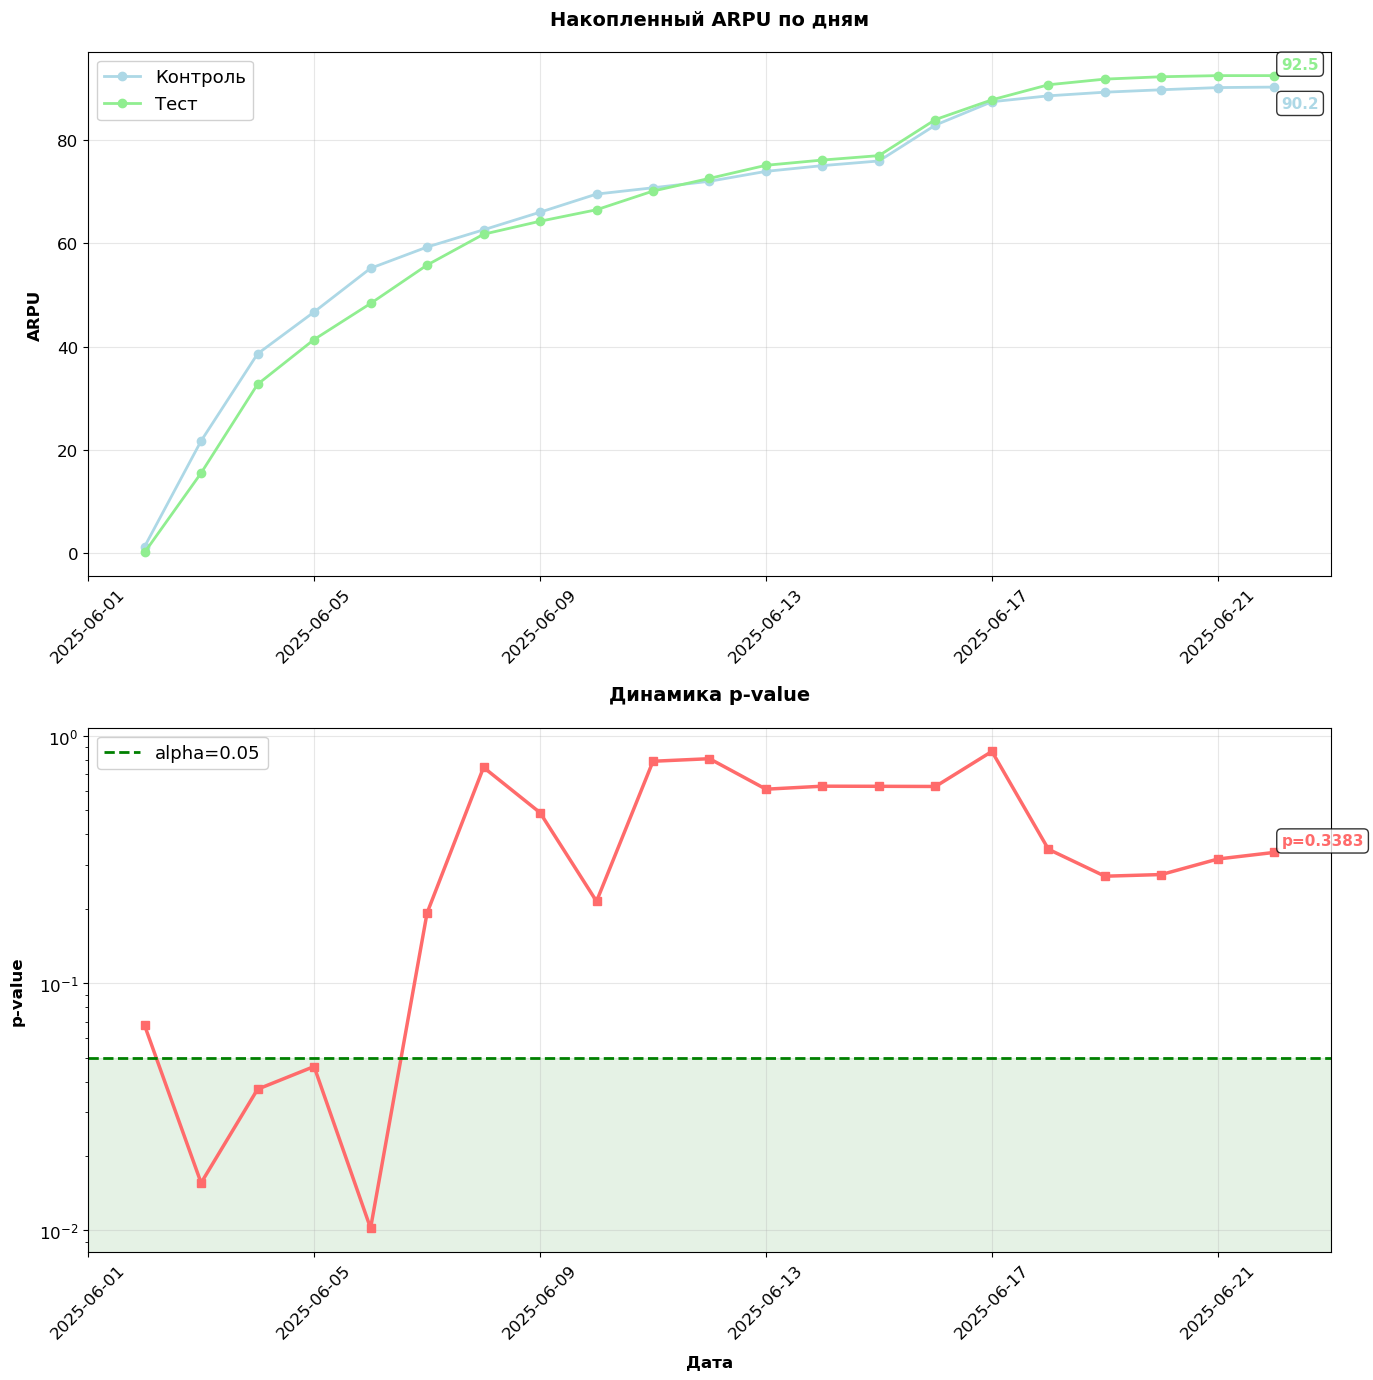

📊 Итоговые значения на последний день:
Контрольная группа ARPU: 90.24
Тестовая группа ARPU: 92.46
Разница: 2.22 (+2.5%)
📊 T-ТЕСТ ARPU ПО ГРУППАМ
ГИПОТЕЗЫ
H0: ARPU в группе A и группе B равны (p1 = p2)
H1: ARPU различны (p1 ≠ p2)
p-value: 0.3383
Статистическая значимость: Нет
➖ Нет статистически значимого различия в средней сумме депозитов между группами


In [35]:
# Подготовка данных
df['date'] = pd.to_datetime(df['event_ts']).dt.date
dates = sorted(df['date'].unique())

# Расчет накопленного ARPU и p-value по дням
results = []
for current_date in dates:
    # Данные до текущей даты
    mask = df['date'] <= current_date
    current_df = df[mask]
    
    # ARPU по группам (без выбросов > 99%)
    arpu_data = current_df.groupby('group').agg(
        total_amount=('amount', 'sum'),
        users=('user_id', 'nunique'))
    arpu_data['arpu'] = arpu_data['total_amount'] / arpu_data['users']
    
    # p-value
    # Находим группу для каждого пользователя (берем первую запись)
    user_groups = current_df.groupby('user_id')['group'].first().reset_index()
    # Суммируем депозиты для каждого пользователя
    user_deposits = current_df.groupby('user_id')['amount'].sum().reset_index()
    # Объединяем информацию о группе и депозитах
    user_data = pd.merge(user_groups, user_deposits, on='user_id')

    # Выполняем t-тест
    control = user_data[user_data['group'] == 'control']['amount']
    test = user_data[user_data['group'] == 'test']['amount']
    _, p_value = ttest_ind(control, test, equal_var=False, alternative='two-sided')
    
    results.append({
        'date': current_date,
        'control_arpu': arpu_data.loc['control', 'arpu'],
        'test_arpu': arpu_data.loc['test', 'arpu'],
        'p_value': p_value,
        'control_users': len(control),
        'test_users': len(test)
    })

results_df = pd.DataFrame(results)

# Визуализация
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

# График ARPU
ax1.plot(results_df['date'], results_df['control_arpu'], 
         label='Контроль', marker='o', linewidth=2, color='lightblue', markersize=6)
ax1.plot(results_df['date'], results_df['test_arpu'], 
         label='Тест', marker='o', linewidth=2, color='lightgreen', markersize=6)
ax1.set_title('Накопленный ARPU по дням', fontweight='bold', pad=20, fontsize=14)
ax1.set_ylabel('ARPU', fontweight='bold', labelpad=10)
ax1.legend(framealpha=0.9, loc='upper left')
ax1.grid(alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Добавляем подписи значений для последней точки
last_date = results_df['date'].iloc[-1]
last_control = results_df['control_arpu'].iloc[-1]
last_test = results_df['test_arpu'].iloc[-1]

ax1.annotate(f'{last_control:.1f}', 
             xy=(last_date, last_control), 
             xytext=(5, -15), textcoords='offset points',
             fontweight='bold', fontsize=11, color='lightblue',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax1.annotate(f'{last_test:.1f}', 
             xy=(last_date, last_test), 
             xytext=(5, 5), textcoords='offset points',
             fontweight='bold', fontsize=11, color='lightgreen',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
# График p-value
ax2.plot(results_df['date'], results_df['p_value'], 
          color='#FF6B6B', marker='s', linewidth=2.5, markersize=6)
ax2.axhline(0.05, color='green', linestyle='--', linewidth=2, label='alpha=0.05')
ax2.set_title('Динамика p-value', fontweight='bold', pad=20, fontsize=14)
ax2.set_ylabel('p-value', fontweight='bold', labelpad=10)
ax2.set_xlabel('Дата', fontweight='bold', labelpad=10)
ax2.legend(framealpha=0.9, loc='upper left')
ax2.grid(alpha=0.3)
ax2.set_yscale('log')
ax2.tick_params(axis='x', rotation=45)

# Добавляем подпись для последнего p-value
last_pvalue = results_df['p_value'].iloc[-1]
ax2.annotate(f'p={last_pvalue:.4f}', 
             xy=(last_date, last_pvalue), 
             xytext=(5, 5), textcoords='offset points',
             fontweight='bold', fontsize=11, color='#FF6B6B',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Подсветка зоны статистической значимости
ax2.axhspan(0, 0.05, alpha=0.1, color='green')

plt.tight_layout()
plt.show()

# Вывод итоговых значений
print("📊 Итоговые значения на последний день:")
print(f"Контрольная группа ARPU: {last_control:.2f}")
print(f"Тестовая группа ARPU: {last_test:.2f}")
print(f"Разница: {last_test - last_control:.2f} ({((last_test/last_control)-1)*100:+.1f}%)")

print("📊 T-ТЕСТ ARPU ПО ГРУППАМ")
print("=" * 70)
print('ГИПОТЕЗЫ\nH0: ARPU в группе A и группе B равны (p1 = p2)\nH1: ARPU различны (p1 ≠ p2)')
print("=" * 70)
print(f"p-value: {last_pvalue:.4f}")
print(f"Статистическая значимость: {'Да' if last_pvalue <= 0.05 else 'Нет'}")

# 8. Интерпретация результата для ARPU
if last_pvalue < 0.05:
    if last_test > last_control:
        print("✅ Тестовая группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО бóльшую среднюю сумму депозитов")
    else:
        print("✅ Контрольная группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО бóльшую среднюю сумму депозитов")
else:
    print("➖ Нет статистически значимого различия в средней сумме депозитов между группами")

- **Конверсия из регистрации в первый депозит**

In [36]:
# Подготовка данных для Z-теста

# Считаем зарегистрировавшихся пользователей 
registered_users = df[
    df['event_name']=='registration'].groupby('group')['user_id'].nunique().reset_index(name='registered_users')

# Считаем пользователей 
first_deposit_users = df[
    df['event_name']=='first_deposit'].groupby('group')['user_id'].nunique().reset_index(name='first_deposit_users')

# Объединяем и считаем конверсию
cvr_reg_1stdep = pd.merge(registered_users, first_deposit_users, on='group')
cvr_reg_1stdep['cvr_reg_1stdep'] = 100*cvr_reg_1stdep['first_deposit_users']/cvr_reg_1stdep['registered_users']

# Контрольная группа
control_registered = cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'control']['registered_users'].values[0]
control_deposits = cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'control']['first_deposit_users'].values[0]

# Тестовая группа
test_registered = cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'test']['registered_users'].values[0]
test_deposits = cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'test']['first_deposit_users'].values[0]

# Проводим Z-тест для пропорций
count = np.array([control_deposits, test_deposits])    # количество успехов
nobs = np.array([control_registered, test_registered]) # общее количество наблюдений

z_score, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Выводим результаты
print("📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ КОНВЕРСИЙ ИЗ РЕГИСТРАЦИИ В ПЕРВЫЙ ДЕПОЗИТ ПО ГРУППАМ")
print("=" * 70)
print('ГИПОТЕЗЫ\nH0: конверсии в группах A и B равны (p1 = p2)\nH1: конверсии в группах A и B различны (p1 ≠ p2)')
print("=" * 70)
print("\n📊 Результаты Z-теста:")
print("=" * 65)
print(f"Контрольная группа: {control_deposits}/{control_registered} = {cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'control']['cvr_reg_1stdep'].values[0]:.2f}%")
print(f"Тестовая группа:    {test_deposits}/{test_registered} = {cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'test']['cvr_reg_1stdep'].values[0]:.2f}%")
print(f"Разница:            {cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'test']['cvr_reg_1stdep'].values[0] - cvr_reg_1stdep[cvr_reg_1stdep['group'] == 'control']['cvr_reg_1stdep'].values[0]:.2f}%")
print(f"Z-статистика:       {z_score:.4f}")
print(f"P-value:            {p_value:.6f}")

# Определяем статистическую значимость
if p_value < 0.001:
    significance = "ВЫСОКОЗНАЧИМАЯ разница (p < 0.001) 💪"
elif p_value < 0.01:
    significance = "ЗНАЧИМАЯ разница (p < 0.01) ✅"
elif p_value < 0.05:
    significance = "ЗНАЧИМАЯ разница (p < 0.05) ✅"
else:
    significance = "Разница НЕ ЗНАЧИМА (p ≥ 0.05) ❌"

print(f"\nСтатистическая значимость: {significance}")

# Интерпретация результата
if p_value < 0.05:
    if test_deposits/test_registered > control_deposits/control_registered:
        print("✅ Тестовая группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО более высокую конверсию")
    else:
        print("✅ Контрольная группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО более высокую конверсию")
else:
    print("➖ Нет статистически значимого различия в конверсии между группами")

📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ КОНВЕРСИЙ ИЗ РЕГИСТРАЦИИ В ПЕРВЫЙ ДЕПОЗИТ ПО ГРУППАМ
ГИПОТЕЗЫ
H0: конверсии в группах A и B равны (p1 = p2)
H1: конверсии в группах A и B различны (p1 ≠ p2)

📊 Результаты Z-теста:
Контрольная группа: 3228/4512 = 71.54%
Тестовая группа:    2987/4265 = 70.04%
Разница:            -1.51%
Z-статистика:       1.5525
P-value:            0.120543

Статистическая значимость: Разница НЕ ЗНАЧИМА (p ≥ 0.05) ❌
➖ Нет статистически значимого различия в конверсии между группами


C:\Users\urize\AppData\Local\Temp\ipykernel_19968\3724674599.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['event_name']=='registration'].groupby('group')['user_id'].nunique().reset_index(name='registered_users')
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\3724674599.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['event_name']=='first_deposit'].groupby('group')['user_id'].nunique().reset_index(name='first_deposit_users')


- **Вспомогательная метрика 1 — конверсия из первого депозита во второй**

In [37]:
# Подготовка данных для Z-теста
# Считаем пользователей c 1 депозитом
first_deposit_users = df[
    df['event_name']=='first_deposit'].groupby('group')['user_id'].nunique().reset_index(name='first_deposit_users')

# Считаем пользователей с 2 депозитом
second_deposit_users = df[
    df['event_name']=='second_deposit'].groupby('group')['user_id'].nunique().reset_index(name='second_deposit_users')

# Объединяем и считаем конверсию
cvr_1stdep_2nddep = pd.merge(first_deposit_users, second_deposit_users, on='group')
cvr_1stdep_2nddep['cvr_1stdep_2nddep'] = 100 * cvr_1stdep_2nddep['second_deposit_users'] / cvr_1stdep_2nddep['first_deposit_users']

# Контрольная группа
control_1st = cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'control']['first_deposit_users'].values[0]
control_2nd = cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'control']['second_deposit_users'].values[0]

# Тестовая группа
test_1st = cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'test']['first_deposit_users'].values[0]
test_2nd = cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'test']['second_deposit_users'].values[0]

# Проводим Z-тест для пропорций
count = np.array([control_2nd, test_2nd])    # количество успехов (вторые депозиты)
nobs = np.array([control_1st, test_1st])     # общее количество наблюдений (первые депозиты)

z_score, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Выводим результаты
print("📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ КОНВЕРСИЙ ИЗ ПЕРВОГО ДЕПОЗИТА ВО ВТОРОЙ ПО ГРУППАМ")
print("=" * 70)
print('ГИПОТЕЗЫ\nH0: конверсии в контрольной и тестовой группах равны (p1 = p2)\nH1: конверсии в контрольной и тестовой группах различны (p1 ≠ p2)')
print("=" * 70)
print("\n📊 Результаты Z-теста:")
print("=" * 65)
print(f"Контрольная группа: {control_2nd}/{control_1st} = {cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'control']['cvr_1stdep_2nddep'].values[0]:.2f}%")
print(f"Тестовая группа:    {test_2nd}/{test_1st} = {cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'test']['cvr_1stdep_2nddep'].values[0]:.2f}%")
print(f"Разница:            {cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'test']['cvr_1stdep_2nddep'].values[0] - cvr_1stdep_2nddep[cvr_1stdep_2nddep['group'] == 'control']['cvr_1stdep_2nddep'].values[0]:.2f}%")
print(f"Z-статистика:       {z_score:.4f}")
print(f"P-value:            {p_value:.6f}")

# Определяем статистическую значимость
if p_value < 0.001:
    significance = "ВЫСОКОЗНАЧИМАЯ разница (p < 0.001) 💪"
elif p_value < 0.01:
    significance = "ЗНАЧИМАЯ разница (p < 0.01) ✅"
elif p_value < 0.05:
    significance = "ЗНАЧИМАЯ разница (p < 0.05) ✅"
else:
    significance = "Разница НЕ ЗНАЧИМА (p ≥ 0.05) ❌"

print(f"\nСтатистическая значимость: {significance}")

# Интерпретация результата
if p_value < 0.05:
    if test_2nd/test_1st > control_2nd/control_1st:
        print("✅ Тестовая группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО более высокую конверсию во второй депозит")
    else:
        print("✅ Контрольная группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО более высокую конверсию во второй депозит")
else:
    print("➖ Нет статистически значимого различия в конверсии между группами")

📊 Z-ТЕСТ ПРОПОРЦИЙ ДЛЯ КОНВЕРСИЙ ИЗ ПЕРВОГО ДЕПОЗИТА ВО ВТОРОЙ ПО ГРУППАМ
ГИПОТЕЗЫ
H0: конверсии в контрольной и тестовой группах равны (p1 = p2)
H1: конверсии в контрольной и тестовой группах различны (p1 ≠ p2)

📊 Результаты Z-теста:
Контрольная группа: 654/3228 = 20.26%
Тестовая группа:    974/2987 = 32.61%
Разница:            12.35%
Z-статистика:       -11.0612
P-value:            0.000000

Статистическая значимость: ВЫСОКОЗНАЧИМАЯ разница (p < 0.001) 💪
✅ Тестовая группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО более высокую конверсию во второй депозит


C:\Users\urize\AppData\Local\Temp\ipykernel_19968\1820227938.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['event_name']=='first_deposit'].groupby('group')['user_id'].nunique().reset_index(name='first_deposit_users')
C:\Users\urize\AppData\Local\Temp\ipykernel_19968\1820227938.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['event_name']=='second_deposit'].groupby('group')['user_id'].nunique().reset_index(name='second_deposit_users')


- **Вспомогательная метрика 2 — средняя сумма всех депозитов на пользователя, который открыл хотя бы один депозит**

In [38]:
# 1. Находим всех пользователей, у которых был ХОТЯ БЫ ОДИН депозит
users_with_deposits = df[df['event_name'].isin(['first_deposit', 'second_deposit'])]['user_id'].unique()

# 2. Находим группу для каждого пользователя
user_groups = df.groupby('user_id')['group'].first().reset_index()

# 3. Суммируем ВСЕ депозиты для каждого пользователя ИЗ СПИСКА users_with_deposits
user_deposits = df[df['user_id'].isin(users_with_deposits)].groupby('user_id')['amount'].sum().reset_index()

# 4. Объединяем информацию о группе и депозитах
user_data = pd.merge(user_groups, user_deposits, on='user_id')

# 5. Разделяем данные по группам для t-теста
metric_a = user_data[user_data['group'] == 'control']['amount'].dropna()
metric_b = user_data[user_data['group'] == 'test']['amount'].dropna()

# 6. Проводим двусторонний t-тест Уэлча
stat_welch_ttest, p_value_welch_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    equal_var=False,
    alternative='two-sided'
)

# 7. Выводим результаты
print("📊 T-ТЕСТ ARPPU - СРЕДНЕЙ СУММЫ ДЕПОЗИТОВ НА ПЛАТЯЩЕГО ПОЛЬЗОВАТЕЛЯ ПО ГРУППАМ")
print("=" * 70)
print('ГИПОТЕЗЫ\nH0: ARPPU в группе A и группе B равны (μ_A = μ_B)\nH1: ARPPU различны (μ_A ≠ μ_B)')
print("=" * 70)
print("\n📊 Результаты t-теста")
print("=" * 75)
print(f"Контрольная группа (A): {metric_a.mean():.2f} ± {metric_a.std():.2f} (n={len(metric_a)})")
print(f"Тестовая группа (B):    {metric_b.mean():.2f} ± {metric_b.std():.2f} (n={len(metric_b)})")
print(f"Разница (B - A):        {metric_b.mean() - metric_a.mean():.2f}")
print(f"t-статистика:           {stat_welch_ttest:.4f}")
print(f"p-value:                {p_value_welch_ttest:.6f}")

# 8. Определяем статистическую значимость
if p_value_welch_ttest < 0.001:
    significance = "ВЫСОКОЗНАЧИМАЯ разница (p < 0.001) 💪"
elif p_value_welch_ttest < 0.01:
    significance = "ЗНАЧИМАЯ разница (p < 0.01) ✅"
elif p_value_welch_ttest < 0.05:
    significance = "ЗНАЧИМАЯ разница (p < 0.05) ✅"
else:
    significance = "Разница НЕ ЗНАЧИМА (p ≥ 0.05) ❌"

print(f"\nСтатистическая значимость: {significance}")

# 9. Интерпретация результата
if p_value_welch_ttest < 0.05:
    if metric_b.mean() > metric_a.mean():
        print("✅ Тестовая группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО бóльший ARPPU")
    else:
        print("✅ Контрольная группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО бóльший ARPPU")
else:
    print("➖ Нет статистически значимого различия в ARPPU между группами")

📊 T-ТЕСТ ARPPU - СРЕДНЕЙ СУММЫ ДЕПОЗИТОВ НА ПЛАТЯЩЕГО ПОЛЬЗОВАТЕЛЯ ПО ГРУППАМ
ГИПОТЕЗЫ
H0: ARPPU в группе A и группе B равны (μ_A = μ_B)
H1: ARPPU различны (μ_A ≠ μ_B)

📊 Результаты t-теста
Контрольная группа (A): 135.50 ± 58.70 (n=3228)
Тестовая группа (B):    141.40 ± 146.47 (n=2987)
Разница (B - A):        5.90
t-статистика:           -2.0540
p-value:                0.040039

Статистическая значимость: ЗНАЧИМАЯ разница (p < 0.05) ✅
✅ Тестовая группа имеет СТАТИСТИЧЕСКИ ЗНАЧИМО бóльший ARPPU


### **Итоговый вывод по результатам A/B-теста**

**✅ Новый онбординг РАБОТАЕТ, но избирательно:**

1. **Главный успех**: 
   - **Конверсия во второй депозит выросла на +12.35%** (20.26% → 32.61%)
   - Высокозначимое улучшение (p < 0.001) 💪
   - Пользователи стали **в 1.6 раза чаще** совершать повторные пополнения

2. **Умеренное улучшение**:
   - **ARPPU вырос на +5.90** (135.50 → 141.40)
   - Статистически значимо (p = 0.04) ✅
   - Платящие пользователи стали вкладывать больше

3. **Без изменений**:
   - Конверсия в первый депозит: 71.54% → 70.04%(разница не статистически значима)
   - Общий ARPU на всех пользователей: 90.24 → 92.46 (разница не статистически значима)

**📈 Ключевой инсайт**: Новый онбординг не привлекает новых инвесторов, но **кардинально улучшает удержание и монетизацию** существующих. Пользователи лучше понимают риски и чаще возвращаются для повторных инвестиций.

**🎯 Рекомендация**: Внедрить новый онбординг, так как он решает основную проблему продукта - низкую повторную вовлеченность, что в долгосрочной перспективе даст больший эффект, чем разовая конверсия.

---

### Анализ изменений суммы депозитов на платящего пользователя

Новая фича могла повлиять на поведение пользователей.
- Пользователи, которые раньше вносили небольшие суммы, могли стать более осторожными, сократить свои вложения или совсем перестать платить. Это отразится в снижении 25-го перцентиля суммы депозитов в тестовой группе.
- Пользователи, которые склонны к более крупным инвестициям, могли сильнее вовлечься в продукт и начать вносить больше средств. Это отразится в росте 75-го перцентиля.

Используя бутстрап, сравним разницы перцентилей (25, 50, 75) суммы всех депозитов на платящего пользователя в контрольной и тестовой группах:
- Построим доверительные интервалы для разницы между группами для каждого перцентиля.
- Интерпретируем изменения в контексте сформулированной выше гипотезы.
- Визуализируем результат бутстрап-теста. 

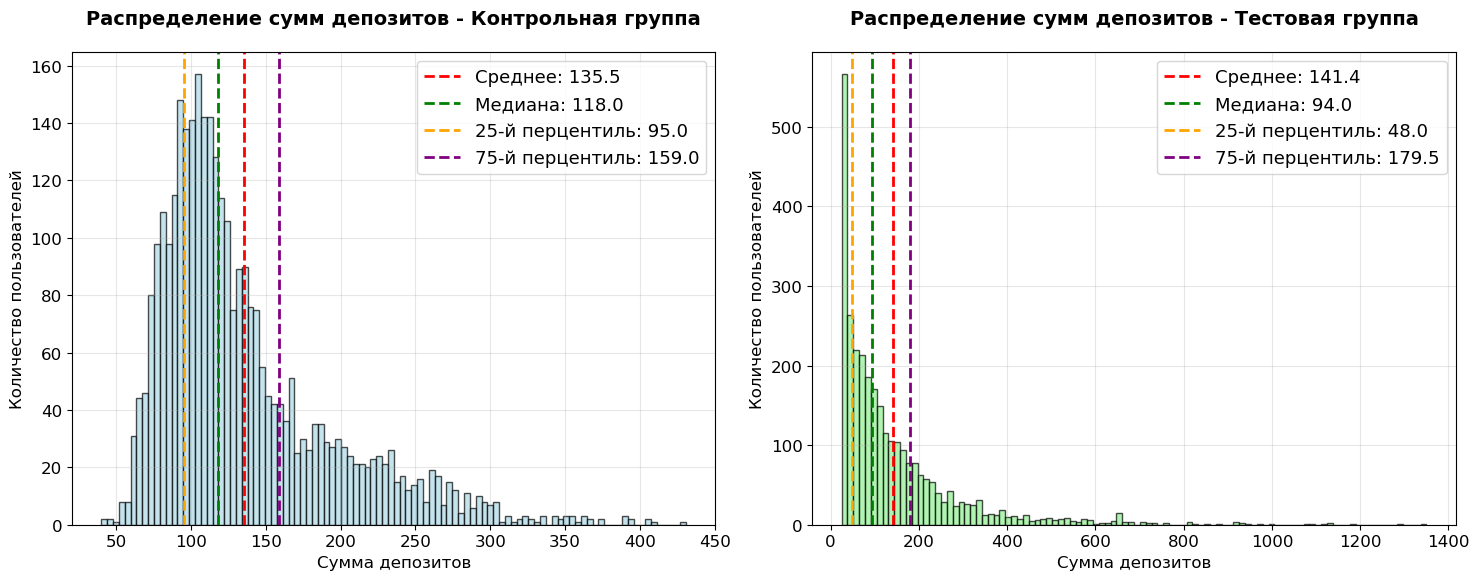

КОНТРОЛЬНАЯ ГРУППА:
Среднее: 135.5
Медиана: 118.0
25-й перцентиль: 95.0
75-й перцентиль: 159.0
Количество пользователей: 3228
Общая сумма депозитов: 437394.0

ТЕСТОВАЯ ГРУППА:
Среднее: 141.4
Медиана: 94.0
25-й перцентиль: 48.0
75-й перцентиль: 179.5
Количество пользователей: 2987
Общая сумма депозитов: 422361.0

РЕЗУЛЬТАТЫ БУТСТРАПА ДЛЯ РАЗЛИЧИЙ В ПЕРЦЕНТИЛЯХ:
25-й перцентиль: 46.85 (95% ДИ: [44.00, 50.00])
50-й перцентиль: 23.30 (95% ДИ: [19.00, 27.00])
75-й перцентиль: -20.37 (95% ДИ: [-30.00, -11.00])


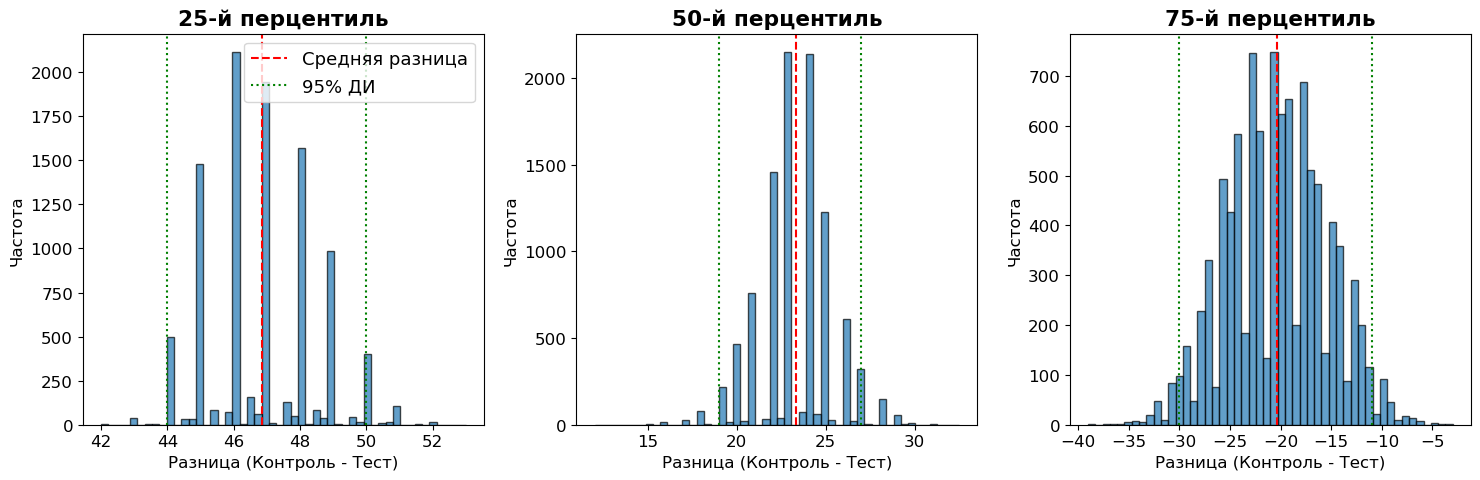

In [39]:
# Собираем данные сумм покупок по каждому пользователю для каждой группы
user_data_control = user_data[user_data['group']=='control'].groupby('user_id')['amount'].sum()
user_data_test = user_data[user_data['group']=='test'].groupby('user_id')['amount'].sum()

# Рассчитываем перцентили
control_25 = np.percentile(user_data_control, 25)
control_75 = np.percentile(user_data_control, 75)
test_25 = np.percentile(user_data_test, 25)
test_75 = np.percentile(user_data_test, 75)

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма для контрольной группы
ax1.hist(user_data_control, bins=100, alpha=0.7, color='lightblue', edgecolor='black')
ax1.axvline(user_data_control.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Среднее: {user_data_control.mean():.1f}')
ax1.axvline(np.median(user_data_control), color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {np.median(user_data_control):.1f}')
ax1.axvline(control_25, color='orange', linestyle='--', linewidth=2,
           label=f'25-й перцентиль: {control_25:.1f}')
ax1.axvline(control_75, color='purple', linestyle='--', linewidth=2,
           label=f'75-й перцентиль: {control_75:.1f}')
ax1.set_title('Распределение сумм депозитов - Контрольная группа', fontsize=14, pad=20)
ax1.set_xlabel('Сумма депозитов', fontsize=12)
ax1.set_ylabel('Количество пользователей', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3)

# Гистограмма для тестовой группы
ax2.hist(user_data_test, bins=100, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.axvline(user_data_test.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Среднее: {user_data_test.mean():.1f}')
ax2.axvline(np.median(user_data_test), color='green', linestyle='--', linewidth=2,
           label=f'Медиана: {np.median(user_data_test):.1f}')
ax2.axvline(test_25, color='orange', linestyle='--', linewidth=2,
           label=f'25-й перцентиль: {test_25:.1f}')
ax2.axvline(test_75, color='purple', linestyle='--', linewidth=2,
           label=f'75-й перцентиль: {test_75:.1f}')
ax2.set_title('Распределение сумм депозитов - Тестовая группа', fontsize=14, pad=20)
ax2.set_xlabel('Сумма депозитов', fontsize=12)
ax2.set_ylabel('Количество пользователей', fontsize=12)
#ax2.set_xlim(0, 450)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Выводим данные контрольной группы
print("КОНТРОЛЬНАЯ ГРУППА:")
print("=" * 40)
print(f"Среднее: {user_data_control.mean():.1f}")
print(f"Медиана: {np.median(user_data_control):.1f}")
print(f"25-й перцентиль: {control_25:.1f}")
print(f"75-й перцентиль: {control_75:.1f}")
print(f"Количество пользователей: {len(user_data_control)}")
print(f"Общая сумма депозитов: {user_data_control.sum():.1f}")
print()

# Выводим данные для тестовой группы
print("ТЕСТОВАЯ ГРУППА:")
print("=" * 40)
print(f"Среднее: {user_data_test.mean():.1f}")
print(f"Медиана: {np.median(user_data_test):.1f}")
print(f"25-й перцентиль: {test_25:.1f}")
print(f"75-й перцентиль: {test_75:.1f}")
print(f"Количество пользователей: {len(user_data_test)}")
print(f"Общая сумма депозитов: {user_data_test.sum():.1f}")
print()

# Собираем данные сумм покупок по каждому пользователю для каждой группы
user_data_control = user_data[user_data['group']=='control'].groupby('user_id')['amount'].sum()
user_data_test = user_data[user_data['group']=='test'].groupby('user_id')['amount'].sum()


# Задаем переменные для бутстрапа
np.random.seed(42)
n_iterations = 10000
percentiles = [25, 50, 75]

# Создаем словарь для хранения результатов
boot_results = {}

for perc in percentiles:
    boot_diffs = []
    
    for i in range(n_iterations):
        # Бутстрап выборки
        boot_control = np.random.choice(user_data_control, size=len(user_data_control), replace=True)
        boot_test = np.random.choice(user_data_test, size=len(user_data_test), replace=True)
        
        # Расчет перцентилей
        perc_control = np.percentile(boot_control, perc)
        perc_test = np.percentile(boot_test, perc)
        boot_diffs.append(perc_control - perc_test)
    
    boot_diffs = np.array(boot_diffs)
    
    # Расчет доверительных интервалов
    ci_lower = np.percentile(boot_diffs, 2.5)
    ci_upper = np.percentile(boot_diffs, 97.5)
    
    # Сохраняем результаты
    boot_results[perc] = {
        'mean_diff': np.mean(boot_diffs),
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'all_diffs': boot_diffs
    }

# Выводим результаты
print("РЕЗУЛЬТАТЫ БУТСТРАПА ДЛЯ РАЗЛИЧИЙ В ПЕРЦЕНТИЛЯХ:")
print("=" * 50)
for perc in percentiles:
    result = boot_results[perc]
    print(f"{perc}-й перцентиль: {result['mean_diff']:.2f} (95% ДИ: [{result['ci_lower']:.2f}, {result['ci_upper']:.2f}])")
    
# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, perc in enumerate(percentiles):
    axes[i].hist(boot_results[perc]['all_diffs'], bins=50, alpha=0.7, edgecolor='black')
    axes[i].axvline(boot_results[perc]['mean_diff'], color='red', linestyle='--', label='Средняя разница')
    axes[i].axvline(boot_results[perc]['ci_lower'], color='green', linestyle=':', label='95% ДИ')
    axes[i].axvline(boot_results[perc]['ci_upper'], color='green', linestyle=':')
    axes[i].set_title(f'{perc}-й перцентиль')
    axes[i].set_xlabel('Разница (Контроль - Тест)')
    axes[i].set_ylabel('Частота')
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()

#### Анализ парадокса: среднее растет, а медиана падает

📊 **Наблюдаемый парадокс:**
- **Среднее:** 135.5 → 141.4 (+4.3%)
- **Медиана:** 118.0 → 94.0 (-20.3%)

🎯 **Основные причины:**

1. **Поляризация пользователей** (главная причина)
- **Мелкие инвесторы:** стали вкладывать НАМНОГО меньшие суммы (-49.5%)
- **Крупные инвесторы:** стали вкладывать более крупные суммы (+12.9%)

2. **Изменение формы распределения**
- **Контроль:** Близко к нормальному распределению
- **Тест:** Сильно скошенное распределение с длинным правым хвостом

3. **Влияние выбросов**
- Появление китов-инвесторов в тестовой группе
- Они "тянут" среднее вверх, но не влияют на медиану



#### Промежуточный вывод по результатам бутстрапа

Результаты бутстрапа согласуются с первоначальной гипотезой:

1. **✅ Для мелких инвесторов (25-й перцентиль):**

   - Ожидалось: "сокращение вложений или прекращение платежей"
   - Факт: **Снижение на 46.85** (95% ДИ: [44.00, 50.00])
   - Испугались рисков → стали вкладывать меньше


2. **✅ Для крупных инвесторов (75-й перцентиль):**

   - Ожидалось: "увеличение сумм вложений"
   - Факт: **Рост на 20.37** (95% ДИ: [-30.00, -11.00])
   - Увидели возможности → стали вкладывать больше


3. **📊 Для средних инвесторов (50-й перцентиль):**
   - Непредвиденное **снижение на 23.30** по причине изменения формы и диапазона распределения:
   - Часть средних перешла в категорию мелких инвесторов

💡 **Вывод:**
Гипотеза о **поляризующем эффекте** нового онбординга полностью подтвердилась. Обучение рискам:
- Мелких инвесторов делает осторожнее (снижение сумм вложений)
- Стимулирует крупных инвесторов к большей активности (рост качества пользовательской базы)
- Создает более здоровую и осознанную инвестиционную среду

**Перспектива:** Несмотря на сокращение сумм вложений мелких инвесторов, общий эффект положителен за счет роста качества монетизации и снижения рисков.

---

## **Выводы** 


---

### **Бизнес-ситуация:**
**Компания:** SollmaFin  
**Продукт:** Мобильное приложение для инвестиций для новичков  
**Рынок:** Латинская Америка (Мексика, Бразилия, Колумбия, Аргентина)  
**Проблема:** Пользователи пополняют счёт, но не инвестируют → нет повторных депозитов → метрики не растут  
**Гипотеза:** Нет понимания рисков → потери → уход из продукта  

### **Цели A/B-теста:**
Проверить, как новый обучающий онбординг влияет на:  
1. **Главная метрика:** Средняя сумма депозитов на всех пользователей (ARPU)  
2. **Барьерная метрика:** Конверсия в первый депозит (не должна упасть)  
3. **Вспомогательные метрики:**  
   - Рост конверсии из первого во второй депозит  
   - Рост среднего чека платящих пользователей (ARPPU)  

### **Что подтвердилось:**
✅ **Работает:**  
- **Повторные депозиты:** +12% (20% → 32%) — главный успех!  
- **Чек опытных инвесторов:** +5.9 (135.5 → 141.4) — стали вкладывать больше  
- **Фильтрация аудитории:**  
  - Мелкие инвесторы: сократили вложения (-46.9) — стали осторожнее  
  - Крупные инвесторы: увеличили вложения (+20.4) — стали активнее  

❌ **Не изменилось:**  
- Конверсия в первый депозит (71.5% → 70%) — поток новых клиентов не пострадал  
- Общая средняя сумма депозитов (90.2 → 92.5)  - не просела

### **Что это значит для бизнеса:**
1. **Онбординг работает как «сито»:** Отсеивает неподготовленных, оставляет серьёзных инвесторов  
2. **Снижаются риски:** Меньше потерь от неосознанных рискованных вложений  
3. **Растёт качество аудитории:** Платящие пользователи стали инвестировать больше и чаще  
4. **Решение:** Внедрять новый онбординг, но добавить упрощённый путь для новичков  

### **Как анализировали:**
- Сравнили воронки конверсии между группами  
- Проверили статистическую значимость изменений (Z-тест, t-тест)  
- Проанализировали распределение сумм депозитов (бутстрап перцентилей)  
- Оценили влияние уровня риска первых инвестиций на поведение  

### **Рекомендации по внедрению:**
1. **Масштабировать** новый онбординг для всей аудитории
2. **Добавить упрощенный путь** для новичков с пошаговым обучением
3. **Внедрить адаптивную систему** рекомендаций по риск-профилям
4. **Мониторить LTV** сегментов в долгосрочной перспективе

---

**Итог:** Образовательный онбординг доказал эффективность как инструмент сегментации и роста LTV. Фича усиливает сильных игроков, но требует точечной настройки для сохранения потенциала осторожных инвесторов.